
## Time Series GPTs

* Time series data 



## Libraries


In [1]:

## !pip install xgboost
## !pip install matplotlib
## !pip install scikit-learn
## !pip install einops
## !pip install similaritymeasures
## !pip install numba
## !pip install cudatoolkit
## !pip install mlxtend


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torch
## torch.set_float32_matmul_precision('medium')
import sklearn
import random
import math
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
## coefficient of determination 
from sklearn.metrics import r2_score
from einops import rearrange
from math import sqrt, log
from datetime import datetime
import similaritymeasures
from sdtw_cuda_loss import SoftDTW
from mlxtend.plotting import heatmap
import mlxtend


In [3]:

import tsGPT_tk as tsGPT
import tsDataWrangling as tsDataWrangling
import Time_Series_GPT as Time_Series_GPT
import inferenceGPT as inferenceGPT



## Instantiate


In [4]:

tsGPT_obj           = tsGPT.ParamsGPT()
tsDataWrangling_obj = tsDataWrangling.tsDataWrangling()
inferenceGPT_obj    = inferenceGPT.inferenceGPT()



## Step 1 - Data Wrangling


In [5]:

tsDataWrangling_obj.step1_wrangle()

tsDataWrangling_obj.FOUR_files_merged_data_rc


0
50000
100000
150000
200000
250000


Timestamp_f1      MM_Timestamp_f1  THEORETICAL_TONNAGE_f3  \
0       2021-08-01 01:23:00  2021-08-01 00:00:00                    6006   
1       2021-08-01 01:23:00  2021-08-01 00:01:00                    6006   
2       2021-08-01 01:23:00  2021-08-01 00:02:00                    6006   
3       2021-08-01 01:23:00  2021-08-01 00:03:00                    6006   
4       2021-08-01 01:23:00  2021-08-01 00:04:00                    6006   
...                     ...                  ...                     ...   
266211  2022-01-31 22:16:00  2022-01-31 22:12:00                    6322   
266212  2022-01-31 22:16:00  2022-01-31 22:13:00                    6322   
266213  2022-01-31 22:16:00  2022-01-31 22:14:00                    6322   
266214  2022-01-31 22:16:00  2022-01-31 22:15:00                    6322   
266215  2022-01-31 22:16:00  2022-01-31 22:16:00                    6322   

        Coke_Rate_f3  HOT_BLAST_TMP_NS_f3  WINDRATE_f3  \
0                992          1999.604384   179.749638   
1                992          2000.288837   179.765945   
2                992          1999.242862   179.782251   
3                992          1999.884442   179.798490   
4                992          1999.849729   179.784430   
...              ...                  ...          ...   
266211           924          2167.603916   189.029098   
266212           924          2167.404841   188.892415   
266213           924          2167.205766   188.689857   
266214           924          2167.006691   188.610793   
266215           924          2166.807617   188.621779   

        SNORT_VALVE_POSITION_f3  COLD_BLAST_MOISTURE_f3  \
0                     98.334297                4.997585   
1                     98.334297                5.000531   
2                     98.334297                5.003476   
3                     98.334297                5.006422   
4                     98.334297                5.009368   
...                         ...                     ...   
266211                98.334297                1.151288   
266212                98.334297                1.151910   
266213                98.334297                1.152533   
266214                98.334297                1.153156   
266215                98.334297                1.153779   

        HOST_BLAST_MOISTURE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0                     8.084517               2.510680           0.0   
1                     8.079545               2.489381           0.0   
2                     8.074573               2.489037           0.0   
3                     8.069602               2.496867           0.0   
4                     8.064630               2.501961           0.0   
...                        ...                    ...           ...   
266211                5.105940               0.000000           0.0   
266212                5.110442               0.000000           0.0   
266213                5.114944               0.000000           0.0   
266214                5.119446               0.000000           0.0   
266215                5.123948               0.000000           0.0   

        NAT_GAS _INJECTION_f3  HOT_BLAST_PRESSURE_f3  TOP_PRESS_f3  \
0                 4034.234339              34.357590     17.398326   
1                 4024.947376              34.328821     17.483486   
2                 4011.601682              34.300052     17.260358   
3                 4012.024633              34.271282     17.212606   
4                 4000.467204              34.242513     17.405035   
...                       ...                    ...           ...   
266211           10497.271240              35.644868     18.695292   
266212           10524.821170              35.648894     17.985995   
266213           10520.260680              35.635697     18.707857   
266214           10518.901880              35.621174     18.198216   
266215           10612.610090              35.602023     18.338861   

  


## Step 2 - Data Wrangling


In [6]:

tsDataWrangling_obj.step2_wrangle()


In [7]:

tsDataWrangling_obj.df_res_shifted 


SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
1     0.719500                4.242439          2161.425209   
2     0.710486                4.174343          2168.238915   
3     0.666106                4.126144          2167.779119   
4     0.675145                4.120736          2166.974740   
5     0.776831                4.120331          2166.384674   
...        ...                     ...                  ...   
1390  0.762500                4.204430          2169.361647   
1391  0.646000                4.208539          2169.079601   
1392  0.654667                4.212648          2168.797556   
1393  0.591667                4.217784          2168.444999   
1394  0.724667                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
1               9306.840913   184.818611                    0.0           0.0   
2               9336.364456   185.993447                    0.0           0.0   
3               9419.200115   185.828474                    0.0           0.0   
4               9564.165802   185.924481                    0.0           0.0   
5               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1390            9297.484543   185.046491                    0.0           0.0   
1391            9312.779010   185.053796                    0.0           0.0   
1392            9303.753420   185.007919                    0.0           0.0   
1393            9333.448101   184.942435                    0.0           0.0   
1394            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  date_f1    CNUM     LNUM_f1  \
1              0.354        0.16  44562.0     2.0  168.666667   
2              0.313        0.83  44562.0     6.0  137.450000   
3              0.360        0.10  44562.0     7.0  156.684211   
4              0.319        0.34  44562.0     8.0  150.869919   
5              0.335        0.28  44562.0     9.0  160.218182   
...              ...         ...      ...     ...         ...   
1390           0.343        0.30  44561.0  4344.0  147.500000   
1391           0.324        0.30  44561.0  4345.0  147.500000   
1392           0.325        0.16  44561.0  4346.0  174.000000   
1393           0.335        0.26  44561.0  4347.0  160.000000   
1394           0.328        1.08  44561.0  4348.0  149.333333   

      Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  \
1               21.080431             18.313322             4.131228   
2               20.996415             18.311768             4.133911   
3               20.749627             18.341701             4.137632   
4               20.609259             18.644476             4.142824   
5               20.617383             18.845791             4.220690   
...                   ...                   ...                  ...   
1390            21.039583             18.308225             4.129485   
1391            21.043999             18.308776             4.129674   
1392            21.048415             18.309327             4.129862   
1393            21.053935             18.310016             4.130097   
1394            21.060559             18.310842             4.130380   

      Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  \
1               54.940123    171.769513    182.533770    148.126483   
2               55.072779    170.595469    183.725050    148.161842   
3               55.375043    167.017421    195.812061    147.562523   
4               55.341884    154.214917    188.028883    147.807509   
5               55.284451    156.234542    200.141261    149.014319   
...                   ...           ...           ...           ...   
1390            55.162782    167.619915    185.900341    148.103530   
1391            55.162767    164.706552    182.408576    148.1060

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 1 to 1394
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SI_f1                    1394 non-null   float64
 1   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 2   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 3   NAT_GAS _INJECTION_f3    1394 non-null   float64
 4   WINDRATE_f3              1394 non-null   float64
 5   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 6   COAL_FLOW_f3             1394 non-null   float64
 7   Cast_Avg_Mn_f2           1394 non-null   float64
 8   Slag_Fe_f2               1394 non-null   float64
 9   date_f1                  1394 non-null   float64
 10  CNUM                     1394 non-null   float64
 11  LNUM_f1                  1394 non-null   float64
 12  Selec_Top_Gas_CO_f3      1394 non-null   float64
 13  Selec_Top_Gas_CO2_f3     1394 non-null   float64
 14  Selec_Top_Gas_H2_f3     

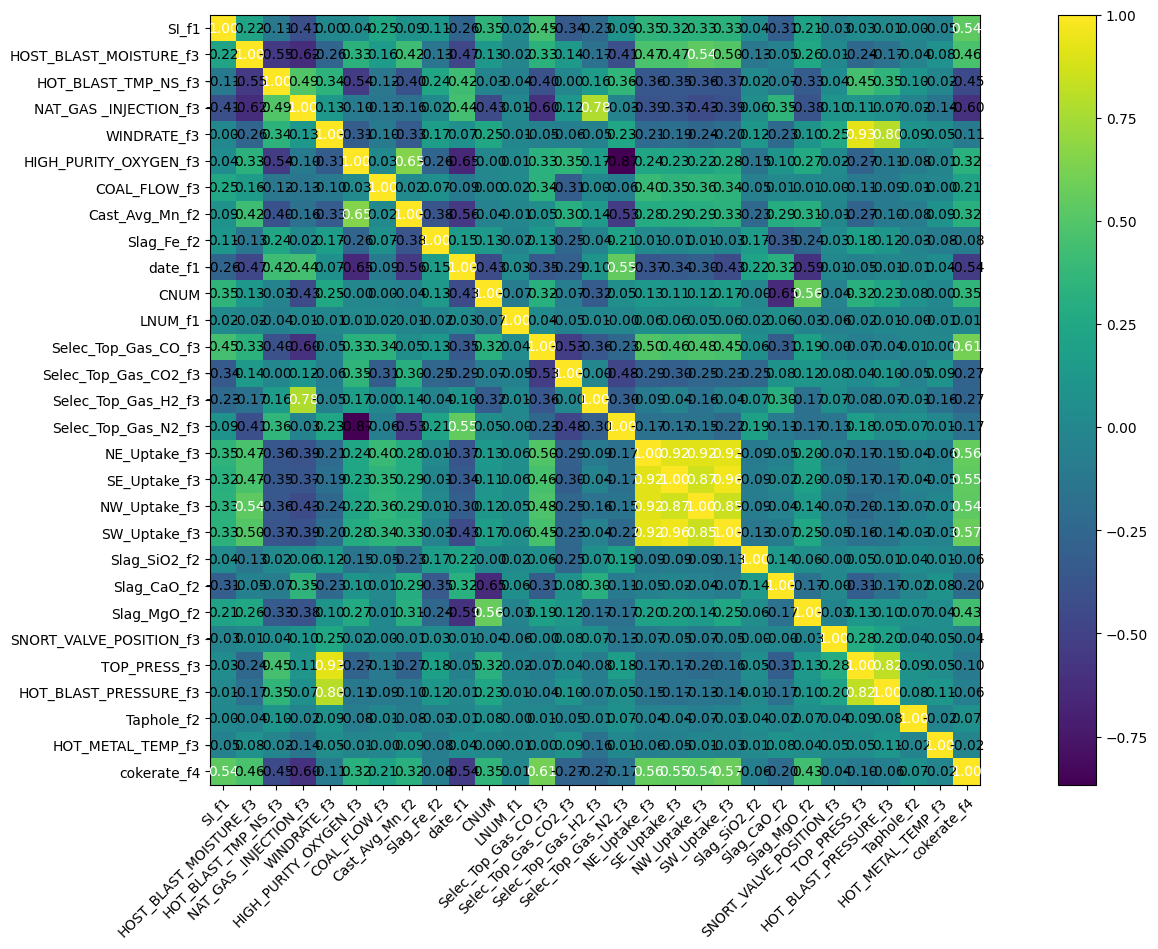

In [8]:

tsDataWrangling_obj.step2_simpler_plot_correlation_matrix(  tsDataWrangling_obj.df_res_shifted    )


In [9]:

tsDataWrangling_obj.dates_df_res_shifted


SI_f1             Date_Map  HOST_BLAST_MOISTURE_f3  \
1     0.719500  2022-01-01 00:45:00                4.242439   
2     0.710486  2022-01-01 08:43:00                4.174343   
3     0.666106  2022-01-01 10:17:00                4.126144   
4     0.675145  2022-01-01 12:40:00                4.120736   
5     0.776831  2022-01-01 15:06:00                4.120331   
...        ...                  ...                     ...   
1390  0.762500  2021-12-31 13:10:00                4.204430   
1391  0.646000  2021-12-31 14:41:00                4.208539   
1392  0.654667  2021-12-31 16:15:00                4.212648   
1393  0.591667  2021-12-31 17:40:00                4.217784   
1394  0.724667  2021-12-31 19:31:00                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
1             2161.425209            9306.840913   184.818611   
2             2168.238915            9336.364456   185.993447   
3             2167.779119            9419.200115   185.828474   
4             2166.974740            9564.165802   185.924481   
5             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1390          2169.361647            9297.484543   185.046491   
1391          2169.079601            9312.779010   185.053796   
1392          2168.797556            9303.753420   185.007919   
1393          2168.444999            9333.448101   184.942435   
1394          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2  \
1                       0.0           0.0           0.354        0.16   
2                       0.0           0.0           0.313        0.83   
3                       0.0           0.0           0.360        0.10   
4                       0.0           0.0           0.319        0.34   
5                       0.0           0.0           0.335        0.28   
...                     ...           ...             ...         ...   
1390                    0.0           0.0           0.343        0.30   
1391                    0.0           0.0           0.324        0.30   
1392                    0.0           0.0           0.325        0.16   
1393                    0.0           0.0           0.335        0.26   
1394                    0.0           0.0           0.328        1.08   

      date_f1    CNUM     LNUM_f1  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
1     44562.0     2.0  168.666667            21.080431             18.313322   
2     44562.0     6.0  137.450000            20.996415             18.311768   
3     44562.0     7.0  156.684211            20.749627             18.341701   
4     44562.0     8.0  150.869919            20.609259             18.644476   
5     44562.0     9.0  160.218182            20.617383             18.845791   
...       ...     ...         ...                  ...                   ...   
1390  44561.0  4344.0  147.500000            21.039583             18.308225   
1391  44561.0  4345.0  147.500000            21.043999             18.308776   
1392  44561.0  4346.0  174.000000            21.048415             18.309327   
1393  44561.0  4347.0  160.000000            21.053935             18.310016   
1394  44561.0  4348.0  149.333333            21.060559             18.310842   

      Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  \
1                4.131228            54.940123    171.769513    182.533770   
2                4.133911            55.072779    170.595469    183.725050   
3                4.137632            55.375043    167.017421    195.812061   
4                4.142824            55.341884    154.214917    188.028883   
5                4.220690            55.284451    156.234542    200.141261   
...                   ...                  ...           ...           ...   
1390             4.129485            55.162782    167.619915    185.900341   
1391     


## Step 3 - Data Wrangling


In [10]:

tsDataWrangling_obj.step3_wrangle()


In [11]:

tsDataWrangling_obj.for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [12]:

tsDataWrangling_obj.delta_for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [13]:

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS.drop(  ['Date_Map'], axis=1 ) 


In [14]:

tsDataWrangling_obj.for_RNN_data_CIVS


delta_SI  mov_avg_SI     SI_f1  HOST_BLAST_MOISTURE_f3  \
0     0.000000    0.000000  0.719500                4.242439   
1     0.000000    0.000000  0.710486                4.174343   
2    -0.044380    0.000000  0.666106                4.126144   
3     0.009040    0.000000  0.675145                4.120736   
4     0.101686    0.000000  0.776831                4.120331   
...        ...         ...       ...                     ...   
1389  0.109500    0.004444  0.762500                4.204430   
1390 -0.116500    0.008900  0.646000                4.208539   
1391  0.008667   -0.037618  0.654667                4.212648   
1392 -0.063000   -0.014340  0.591667                4.217784   
1393  0.133000    0.011422  0.724667                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
0             2161.425209            9306.840913   184.818611   
1             2168.238915            9336.364456   185.993447   
2             2167.779119            9419.200115   185.828474   
3             2166.974740            9564.165802   185.924481   
4             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1389          2169.361647            9297.484543   185.046491   
1390          2169.079601            9312.779010   185.053796   
1391          2168.797556            9303.753420   185.007919   
1392          2168.444999            9333.448101   184.942435   
1393          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  COAL_FLOW_f3  \
0                       0.0    0   45     0    1      1  2022           0.0   
1                       0.0    0   43     8    1      1  2022           0.0   
2                       0.0    0   17    10    1      1  2022           0.0   
3                       0.0    0   40    12    1      1  2022           0.0   
4                       0.0    0    6    15    1      1  2022           0.0   
...                     ...  ...  ...   ...  ...    ...   ...           ...   
1389                    0.0    0   10    13   31     12  2021           0.0   
1390                    0.0    0   41    14   31     12  2021           0.0   
1391                    0.0    0   15    16   31     12  2021           0.0   
1392                    0.0    0   40    17   31     12  2021           0.0   
1393                    0.0    0   31    19   31     12  2021           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.354        0.16     2.0            21.080431   
1              0.313        0.83     6.0            20.996415   
2              0.360        0.10     7.0            20.749627   
3              0.319        0.34     8.0            20.609259   
4              0.335        0.28     9.0            20.617383   
...              ...         ...     ...                  ...   
1389           0.343        0.30  4344.0            21.039583   
1390           0.324        0.30  4345.0            21.043999   
1391           0.325        0.16  4346.0            21.048415   
1392           0.335        0.26  4347.0            21.053935   
1393           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                  ...                  ...   
1389             18.308225             4.129485            55.162782   
1390             18.308776             4.129674            55.162767   
1391             18.309327             4.129862            55.140373   
1392  


## Correlation Matrix


In [15]:

def simple_plot_correlation_matrix( res ):
        print(  res.info()  )
        print(  res.shape   )
        headers_list = ['delta_SI', 'mov_avg_SI', 'SI_f1', 'HOST_BLAST_MOISTURE_f3', 'HOT_BLAST_TMP_NS_f3', 
                        'NAT_GAS _INJECTION_f3', 'WINDRATE_f3', 'HIGH_PURITY_OXYGEN_f3',  
                        'month', 'COAL_FLOW_f3', 'Cast_Avg_Mn_f2', 'Slag_Fe_f2', 
                        'CNUM', 'Selec_Top_Gas_CO_f3', 'Selec_Top_Gas_CO2_f3', 'Selec_Top_Gas_H2_f3', 
                        'Selec_Top_Gas_N2_f3', 'NE_Uptake_f3', 'SE_Uptake_f3', 'NW_Uptake_f3', 'SW_Uptake_f3', 
                        'Slag_SiO2_f2', 'Slag_CaO_f2', 'Slag_MgO_f2', 'SNORT_VALVE_POSITION_f3', 'TOP_PRESS_f3', 
                        'HOT_BLAST_PRESSURE_f3', 'Taphole_f2', 'HOT_METAL_TEMP_f3', 'cokerate_f4']
        ## headers_list = res.columns.values.tolist()
        print(  headers_list  )
        cm = np.corrcoef(  res[ headers_list ].values.T  )
        hm = heatmap(cm, row_names= headers_list, column_names=headers_list, figsize=[20,10])
        plt.show()


In [16]:

'''

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.simulate_better_dataset_more(  
                     tsDataWrangling_obj.for_RNN_data_CIVS    
)


'''


'\n\ntsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.simulate_better_dataset_more(  \n                     tsDataWrangling_obj.for_RNN_data_CIVS    \n)\n\n\n'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 0 to 1393
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   delta_SI                 1394 non-null   float64
 1   mov_avg_SI               1394 non-null   float64
 2   SI_f1                    1394 non-null   float64
 3   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 4   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 5   NAT_GAS _INJECTION_f3    1394 non-null   float64
 6   WINDRATE_f3              1394 non-null   float64
 7   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 8   sec                      1394 non-null   int64  
 9   min                      1394 non-null   int64  
 10  hour                     1394 non-null   int64  
 11  day                      1394 non-null   int64  
 12  month                    1394 non-null   int64  
 13  year                     1394 non-null   int64  
 14  COAL_FLOW_f3            

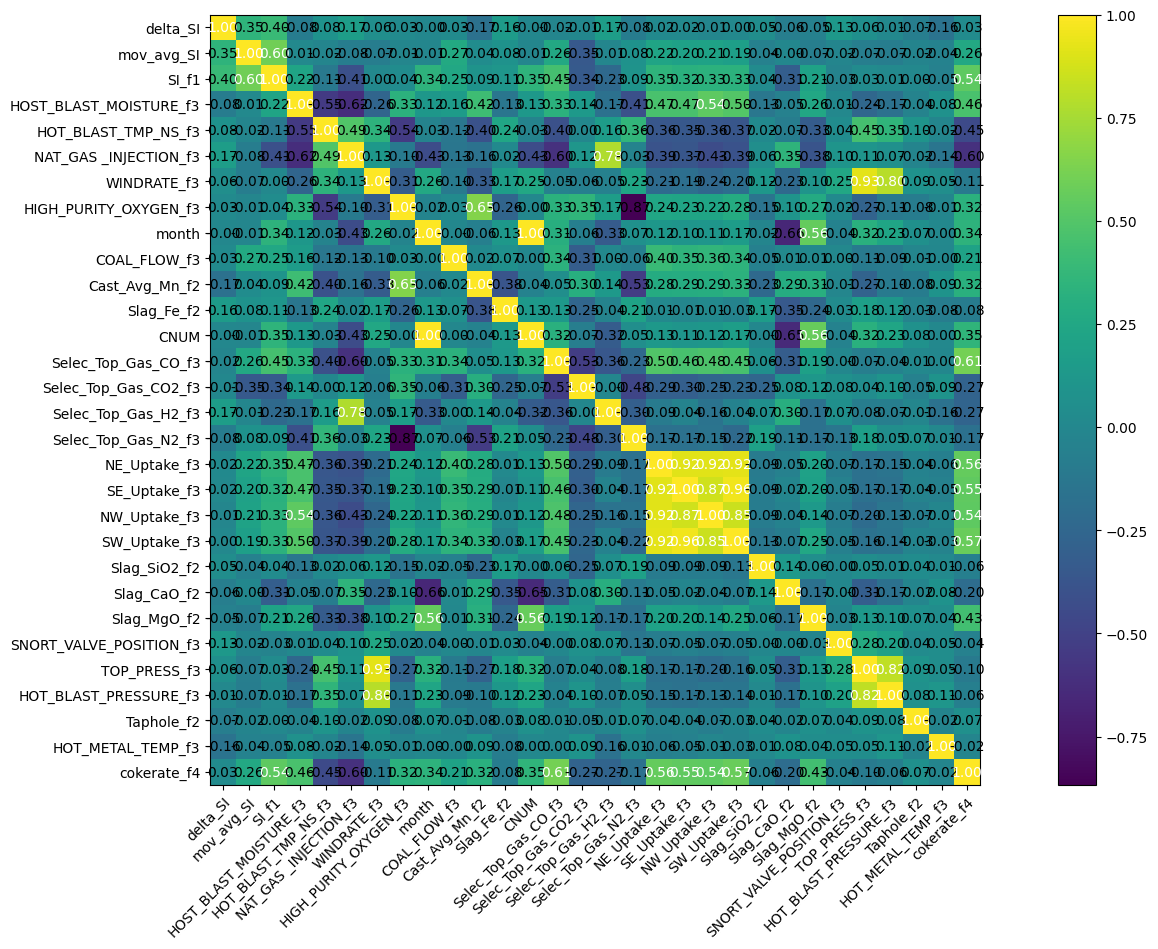

In [17]:


simple_plot_correlation_matrix( tsDataWrangling_obj.for_RNN_data_CIVS   )




## Pass Wrangled data to GPT experimenter


In [18]:

tsGPT_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS 

tsGPT_obj.length_n          = int(   tsGPT_obj.for_RNN_data_CIVS.shape[0]    )
print(     tsGPT_obj.length_n     )


1394



## Training Functions


In [19]:

def custom_loss_ratio(pred, real, mse_weight=0.8, log_ratio_weight=0.2):
    eps = 1e-6
    safe_ratio = torch.clamp(torch.abs((pred + eps) / (real + eps)), min=0.1, max=10.0)
    log_ratio = torch.log(safe_ratio + eps)
    ratio_loss = torch.mean(log_ratio ** 2)
    mse_loss = F.mse_loss(pred, real)
    return mse_weight * mse_loss + log_ratio_weight * ratio_loss



In [20]:

import torch

def log_cosh_loss(pred, target):
    """
    Computes the log-cosh loss between predictions and targets.
    This is smoother than MSE and less sensitive to outliers.

    Args:
        pred (Tensor): Predicted values (e.g., pred_si)
        target (Tensor): Ground truth values (e.g., y_si)

    Returns:
        Tensor: Scalar loss
    """
    return torch.mean(torch.log(torch.cosh(pred - target + 1e-6)))



In [21]:

def custom_loss(loss_SI, loss_all, beta=1.0, desired_ratio=0.25, clip_low=0.5, clip_high=2.0):
    """
    Parameters:
    - loss_SI: torch.Tensor (scalar) — Loss on the silicon prediction
    - loss_all: torch.Tensor (scalar) — Loss on the full feature vector
    - beta: float — weight for ratio regularization
    - desired_ratio: float — the target ratio of SI loss to total loss
    - clip_low, clip_high: float — clipping bounds for the loss ratio (like PPO)

    Returns:
    - loss_total: torch.Tensor (scalar)
    """

    # Compute the raw ratio
    raw_ratio = loss_SI / (loss_all.detach() + 1e-8)

    # Clip the ratio like PPO to prevent extreme swings
    clipped_ratio = torch.clamp(raw_ratio, clip_low, clip_high)

    # Use clipped ratio to weight the loss dynamically
    weighted_SI = clipped_ratio * loss_SI
    weighted_all = (1 - clipped_ratio) * loss_all

    # Main loss component (adaptive weighting)
    loss_main = weighted_SI + weighted_all

    # Regularization to encourage a specific SI/total ratio (stabilizes dynamics)
    loss_total_for_ratio = loss_SI + loss_all + 1e-8
    actual_ratio = loss_SI / loss_total_for_ratio
    ratio_reg = (actual_ratio - desired_ratio).pow(2)

    # Combine total loss
    loss_total = loss_main + beta * ratio_reg

    return loss_total



In [22]:


def function_train_rc(train_CIVS_2, reasoning_steps=1, backprop_through_steps=False):
    
    
    # === Model Setup ===
    model = Time_Series_GPT.Time_Series_GPT(tsGPT_obj).to(tsGPT_obj.device)
    optimizer = torch.optim.Adam(model.parameters(), lr=tsGPT_obj.learning_rate, weight_decay=1e-4)

    criterion = nn.MSELoss()


    # === History ===
    history = {
        'loss': [], 'test_loss': [],
        'loss_A': [], 'loss_B': [], 'loss_C': [],
        'loss_SIM0': [], 'loss_SIM1': [], 'loss_SIM2': [],
        'loss_SIM3': [], 'loss_SIM4': [], 'loss_SIM5': []
    }

    # === Data Scaling ===
    train_CIVS_tr, x_means, x_standard_devs = tsGPT_obj.standardize_x_scales(train_CIVS_2)
    train_CIVS_tr_scaled = (train_CIVS_tr - x_means) / x_standard_devs

    model.train()
    

    for batch_i, epoch in enumerate(range(tsGPT_obj.max_iters)):
        xb, yb = tsGPT_obj.get_batch(train_CIVS_tr_scaled)  # shapes: [B, T, F]
        
        ## B, T, E  = logits.shape
        
        if model.training:
            noise = 0.01 * torch.randn_like(xb)
            xb    = xb + noise.clamp(-0.05, 0.05)

        
        # === Forward Pass with Reasoning Mode ===
        idx_pred, pred_si = model(
            xb, 
            targets=None, 
            reasoning_steps=reasoning_steps,
            backprop_through_steps=backprop_through_steps,
            return_si=True  
        )  # pred: [B, F] (only the last timestep)
        
        pred = idx_pred[:, -1:, :]
        
        #####################################################################################
        
 
        # === Match dimensions for loss ===
        B, T, E = xb.shape
        y_train = yb[:, -1, :]  # last timestep only
        
        ###################################################################################
        
        pred = pred.view(B, E)
        
        y_si = y_train[:, 2]     # [B]
        
        ###################################################################################
        
        loss_just_last   = criterion( pred, y_train)   ## just 9th of 9
        
        ## print(idx_pred.shape)
        ## print(yb.shape)
        ## print(xb.shape)
        ## print(idx_pred[:,-10:, :].shape)
        loss_full_seq    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb)    ## all 9 of 9
        
        all_sequence = True
        
        if all_sequence:
            loss_all = loss_full_seq
        else:
            loss_all = loss_just_last
        
        ###################################################################################
        
        
        ## loss_SI  = criterion(pred_si, y_si)    
        loss_mse  = F.mse_loss(    pred_si, y_si)
        loss_cosh = log_cosh_loss( pred_si, y_si)
        loss_SI_main = 0.5 * loss_mse + 0.5 * loss_cosh
        
        
        ## loss_SI_main = criterion(pred_si, y_si)
        y_si_early   = yb[:, :1, 2]                  # first 4 steps of SI ground truth
        si_mean_early = y_si_early.mean(dim=1)       # average over early steps
        early_penalty = F.mse_loss(pred_si, si_mean_early)
        beta    = 0  # how much to weigh the early trend alignment (can try 0.2–0.4)
        ## beta       = 0.3 * (1 - batch_i / tsGPT_obj.max_iters)

        loss_SI = (1 - beta) * loss_SI_main + beta * early_penalty
        
        
        ##################################
        
        alpha = 0.9
        
        loss_total = alpha * loss_SI + (1 - alpha) * loss_all
        
        
        
        ####################################################################################
        ## loss_total = loss_SI 
        ## loss_total = custom_loss(loss_SI, loss_all, beta=1.0, desired_ratio=0.25)
        ##loss_total = custom_loss_ratio(pred, y_train, mse_weight=0.5, clip_eps=0.2)
        ### ratio 
        ## loss_vector = custom_loss_ratio(pred, y_train, mse_weight=0.5, log_ratio_weight=0.5)
        ## loss_total = alpha * loss_SI + (1 - alpha) * loss_vector
        ####################################################################################

        # === Backprop ===
        optimizer.zero_grad(set_to_none=True)
        loss_total.backward()
        optimizer.step()
         

        # === Logging ===
        history['loss'].append(loss_total.item())
        history['loss_A'].append(loss_SI.item())
        history['loss_B'].append(loss_all.item())
        history['loss_C'].append(0)

        # Placeholders if Curve_SIMs aren't defined
        history['loss_SIM0'].append(0)
        history['loss_SIM1'].append(0)
        

        # === Debug Print ===
        if batch_i % 500 == 0:
            print(f"[{batch_i}] Train Loss: {loss_total.item():.6f}")
            print("Loss_SI:", loss_SI.item(), "Loss_all:", loss_all.item())
            print("Prediction shape:", pred.shape)
            print("===")

    tsGPT_obj.plot_losses_training(history)
    return model, history, x_means, x_standard_devs, train_CIVS_tr_scaled






## Train on Train, Test on Test



## Run 1


In [23]:

all_real_si_300to400 = []
all_pred_si_300to400 = []

all_real_si_200to400 = []
all_pred_si_200to400 = []

all_real_si_100to400 = []
all_pred_si_100to400 = []

all_real_si_000to400 = []
all_pred_si_000to400 = []


In [24]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.518039
Loss_SI: 0.46793368458747864 Loss_all: 0.9689913988113403
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.080505
Loss_SI: 0.027138112112879753 Loss_all: 0.5608022809028625
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.043574
Loss_SI: 0.009321506135165691 Loss_all: 0.3518442213535309
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.048643
Loss_SI: 0.016951613128185272 Loss_all: 0.33386892080307007
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.031275
Loss_SI: 0.00412322161719203 Loss_all: 0.2756417691707611
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.029901
Loss_SI: 0.0033371492754667997 Loss_all: 0.26897692680358887
Prediction shape: torch.Size([32, 35])
===


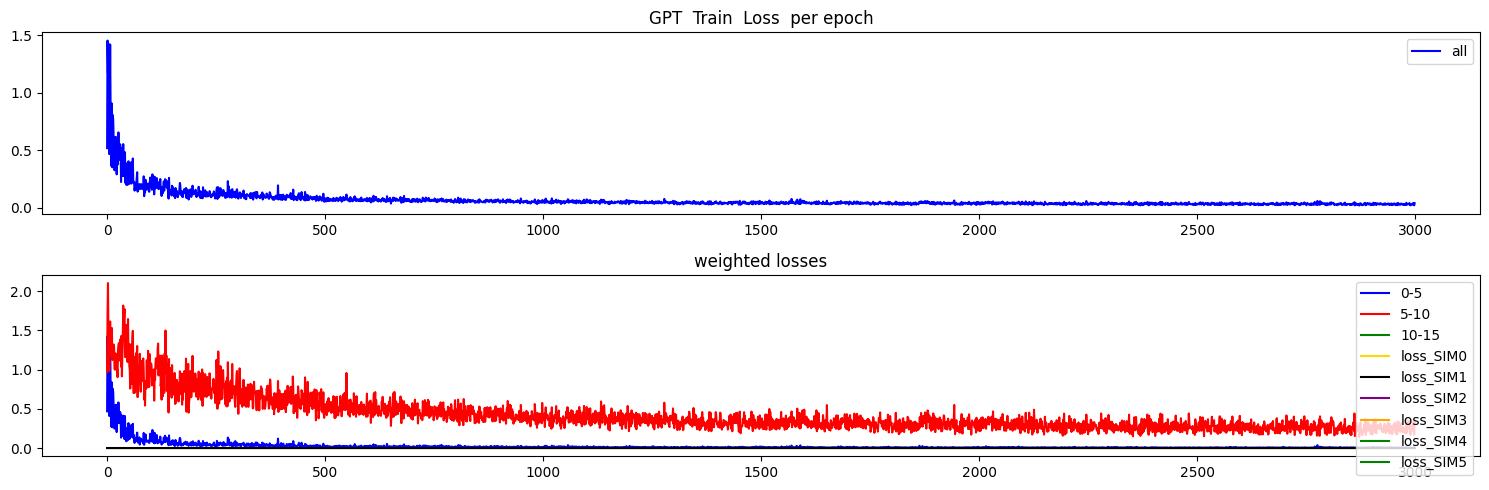

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


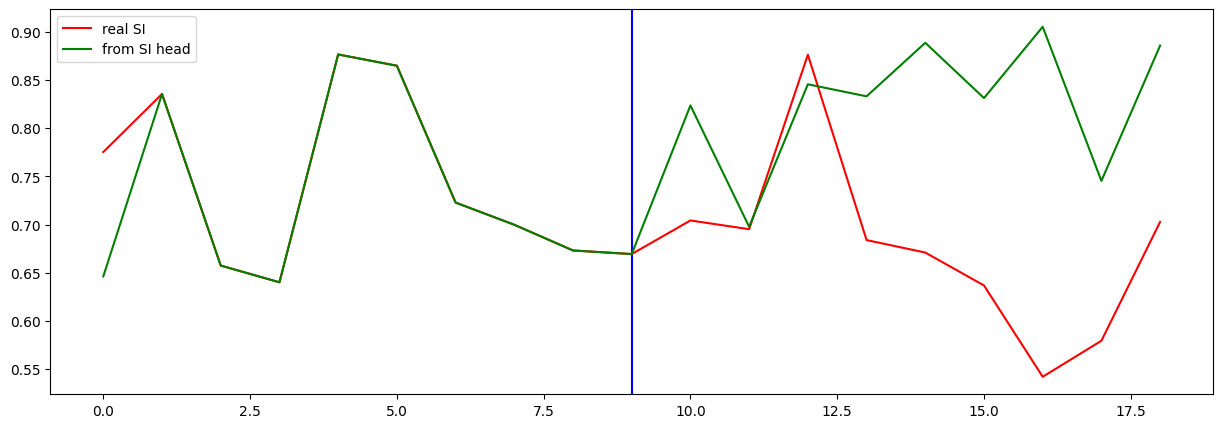

Testing R**2 - (all) - (no inputs):  0.9968282219347039
Testing R**2 - (f2) - SI full (no inputs):  -3.6197339863392353
Testing R**2 - SI head only (no inputs):  -3.643714150433305
0 ...index R**2 (no inputs):  -1.0912779787951643
1 ...index R**2 (no inputs):  0.19316622802799444
2 ...index R**2 (no inputs):  -3.6197339863392353
3 ...index R**2 (no inputs):  -1.2952510848478367
4 ...index R**2 (no inputs):  -1.4017731691583362
5 ...index R**2 (no inputs):  -0.28550543922868954
6 ...index R**2 (no inputs):  -8.62822636190434
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.5062653394894376
10 ...index R**2 (no inputs):  0.3052111257507508
11 ...index R**2 (no inputs):  -15.53659665338419
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -5.412612589158918
16 ...index R**2 (no inputs):  -10.818485064105564
17 ...index R**2 (no inputs):  -94.94920240864

In [25]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk300to400_train,    
                          reasoning_steps=10,
                          backprop_through_steps=True
) 


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 0.473890
Loss_SI: 0.3919451832771301 Loss_all: 1.211397647857666
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.170933
Loss_SI: 0.08224513381719589 Loss_all: 0.9691261649131775
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.123921
Loss_SI: 0.055032383650541306 Loss_all: 0.7439200282096863
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.071102
Loss_SI: 0.02720453590154648 Loss_all: 0.4661758840084076
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.056280
Loss_SI: 0.018555745482444763 Loss_all: 0.3957996964454651
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.048282
Loss_SI: 0.013228734023869038 Loss_all: 0.36376526951789856
Prediction shape: torch.Size([32, 35])
===


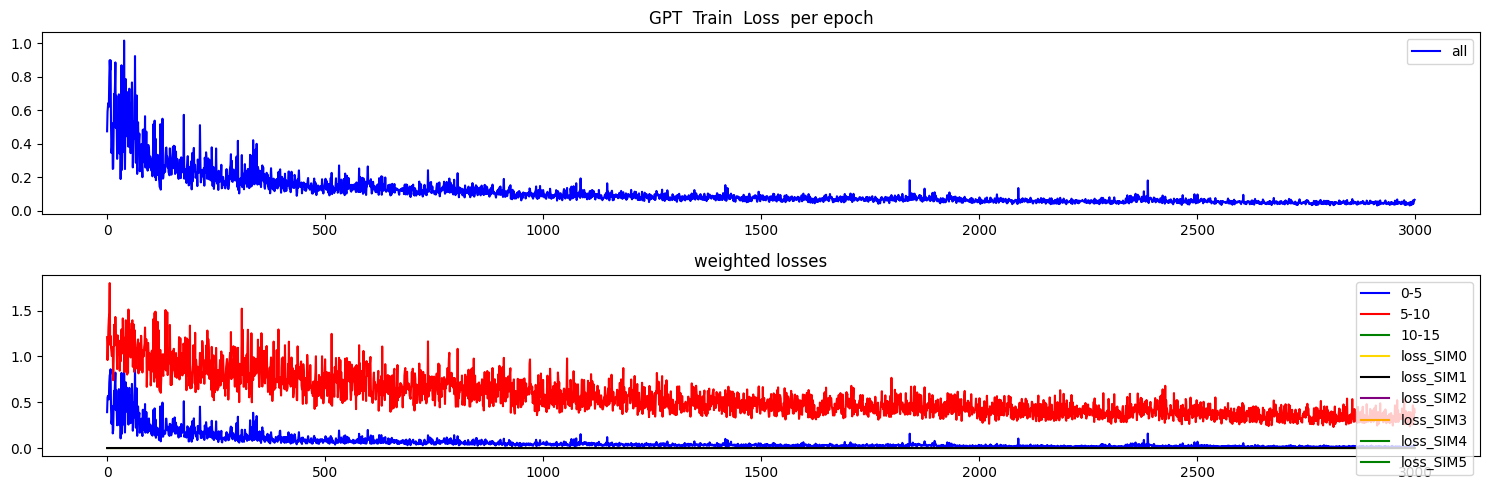

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


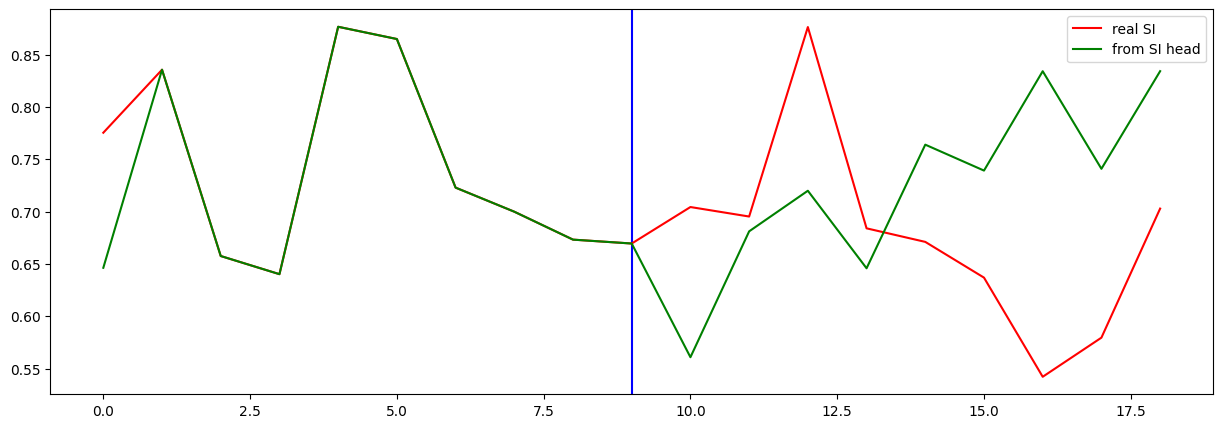

Testing R**2 - (all) - (no inputs):  0.9970034112056919
Testing R**2 - (f2) - SI full (no inputs):  -1.3093947075250334
Testing R**2 - SI head only (no inputs):  -1.3070856587830444
0 ...index R**2 (no inputs):  -0.09384035611682529
1 ...index R**2 (no inputs):  0.06254656287825233
2 ...index R**2 (no inputs):  -1.3093947075250334
3 ...index R**2 (no inputs):  -26.544206965951883
4 ...index R**2 (no inputs):  -0.5274286679253937
5 ...index R**2 (no inputs):  -0.20755133853002006
6 ...index R**2 (no inputs):  -45.994741074815764
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.5906580254735521
10 ...index R**2 (no inputs):  -1.477908541139124
11 ...index R**2 (no inputs):  -160.8619796296234
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -4.630101354012058
16 ...index R**2 (no inputs):  -136.17210432202847
17 ...index R**2 (no inputs):  -227.236944

In [26]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk200to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 0.297283
Loss_SI: 0.2104533314704895 Loss_all: 1.0787488222122192
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.146131
Loss_SI: 0.09298240393400192 Loss_all: 0.6244640946388245
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.129579
Loss_SI: 0.07848817855119705 Loss_all: 0.5893963575363159
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.070355
Loss_SI: 0.030751807615160942 Loss_all: 0.4267803132534027
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.083100
Loss_SI: 0.04498862475156784 Loss_all: 0.42610716819763184
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.075016
Loss_SI: 0.042107850313186646 Loss_all: 0.3711865246295929
Prediction shape: torch.Size([32, 35])
===


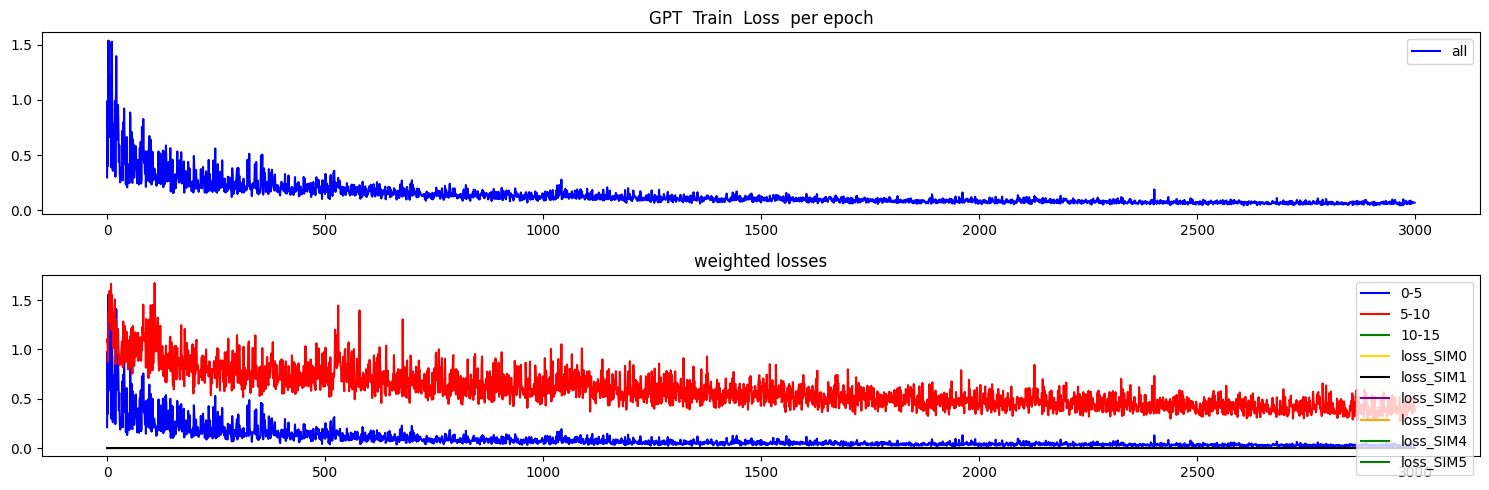

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


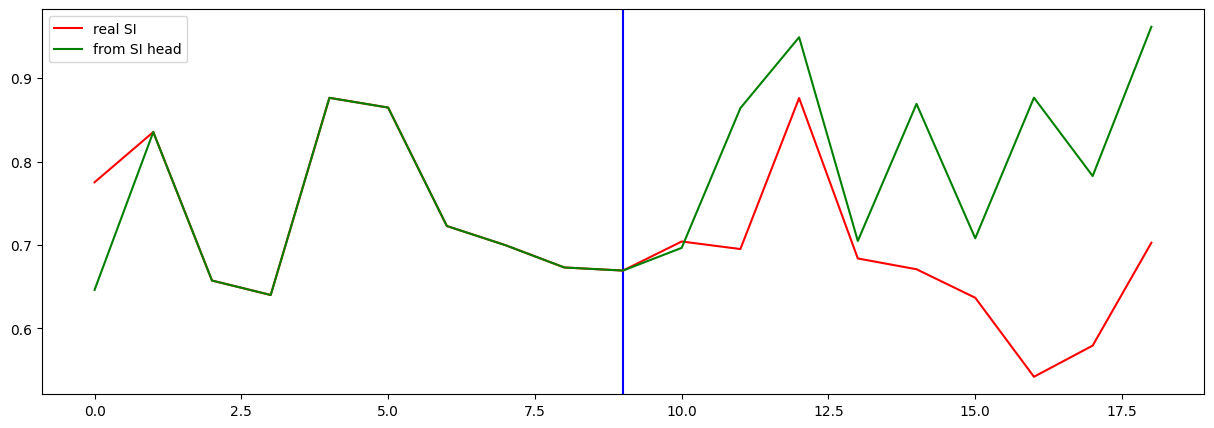

Testing R**2 - (all) - (no inputs):  0.9782431225126292
Testing R**2 - (f2) - SI full (no inputs):  -3.093715692282272
Testing R**2 - SI head only (no inputs):  -2.56848029039222
0 ...index R**2 (no inputs):  -0.5358909040151418
1 ...index R**2 (no inputs):  -1.9075785006227237
2 ...index R**2 (no inputs):  -3.093715692282272
3 ...index R**2 (no inputs):  -358.95326272602375
4 ...index R**2 (no inputs):  -347.0539490265927
5 ...index R**2 (no inputs):  -7.858385505607677
6 ...index R**2 (no inputs):  -150.98634123851747
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.6794186768534647
10 ...index R**2 (no inputs):  0.20764718010874728
11 ...index R**2 (no inputs):  -95.74954377599965
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -13.463866972889992
16 ...index R**2 (no inputs):  -3.5762715447679803
17 ...index R**2 (no inputs):  -56.8535364098485

In [27]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk100to400_train,  
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 0.876842
Loss_SI: 0.8413443565368652 Loss_all: 1.1963176727294922
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.254100
Loss_SI: 0.18873631954193115 Loss_all: 0.8423768877983093
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.186855
Loss_SI: 0.12675991654396057 Loss_all: 0.7277107238769531
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.162393
Loss_SI: 0.1031835675239563 Loss_all: 0.6952778100967407
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.107684
Loss_SI: 0.05616556480526924 Loss_all: 0.5713538527488708
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.079751
Loss_SI: 0.033299341797828674 Loss_all: 0.4978141188621521
Prediction shape: torch.Size([32, 35])
===


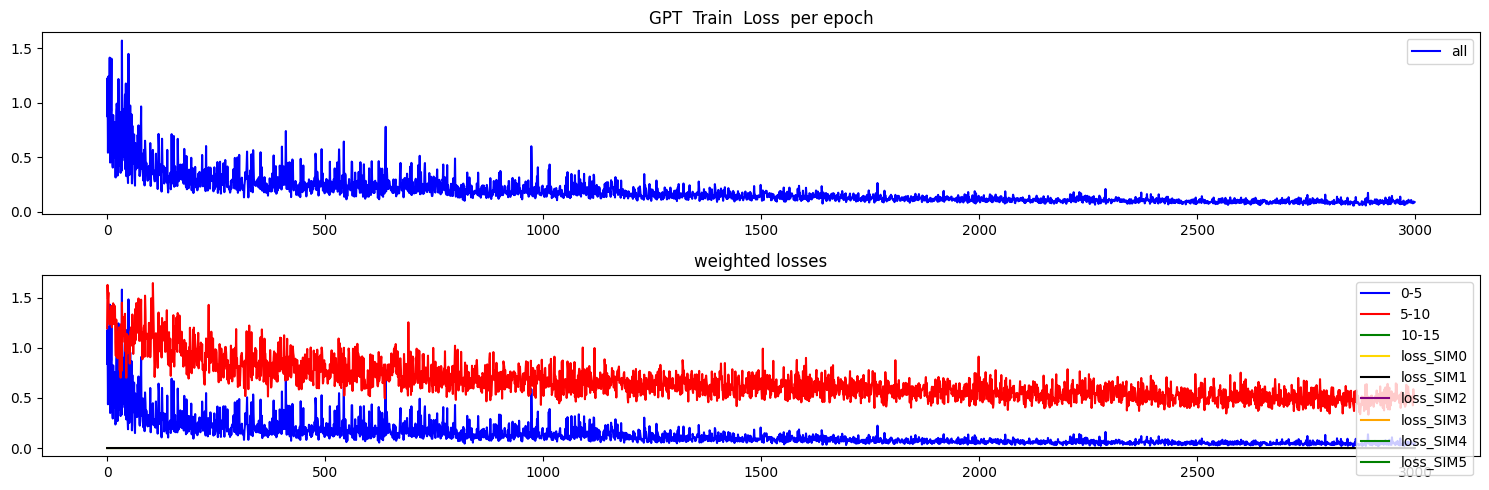

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


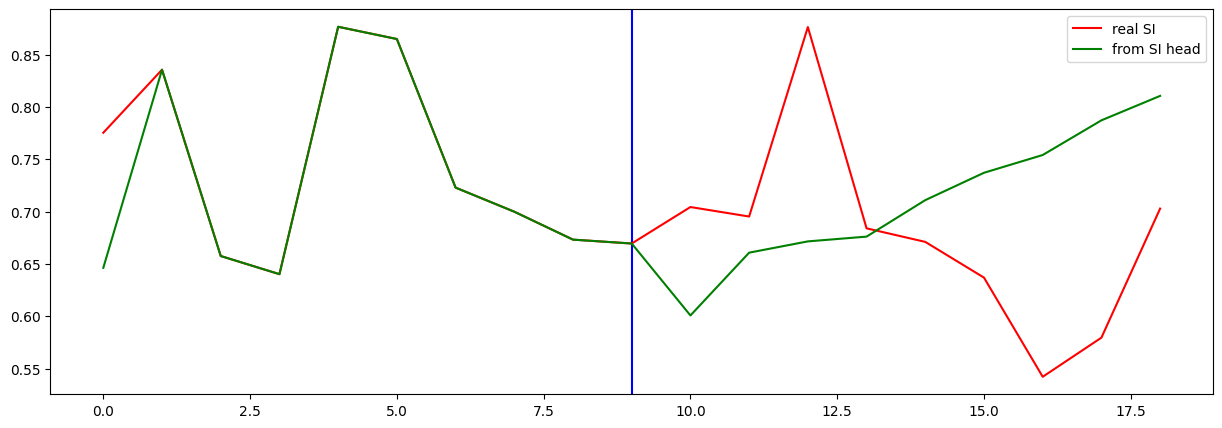

Testing R**2 - (all) - (no inputs):  0.9775967024040939
Testing R**2 - (f2) - SI full (no inputs):  -1.948512499535262
Testing R**2 - SI head only (no inputs):  -0.740245089046204
0 ...index R**2 (no inputs):  0.15641268861840651
1 ...index R**2 (no inputs):  -9.224794539378443
2 ...index R**2 (no inputs):  -1.948512499535262
3 ...index R**2 (no inputs):  -44.818826442694366
4 ...index R**2 (no inputs):  -191.1912013877379
5 ...index R**2 (no inputs):  -8.103756272298481
6 ...index R**2 (no inputs):  -3289.7885055329693
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.09610835284925368
10 ...index R**2 (no inputs):  -1.137100844484058
11 ...index R**2 (no inputs):  -54.19385006060152
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.6067262177094381
16 ...index R**2 (no inputs):  -70.04532856349746
17 ...index R**2 (no inputs):  -510.1679748094129

In [28]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk000to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 2


In [29]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.595300
Loss_SI: 0.5489839315414429 Loss_all: 1.0121437311172485
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.101074
Loss_SI: 0.040955692529678345 Loss_all: 0.6421381235122681
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.063881
Loss_SI: 0.01943351700901985 Loss_all: 0.4639072120189667
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.054897
Loss_SI: 0.01289735920727253 Loss_all: 0.43289706110954285
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.040116
Loss_SI: 0.0047811842523515224 Loss_all: 0.35813021659851074
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.042116
Loss_SI: 0.01661708950996399 Loss_all: 0.27160322666168213
Prediction shape: torch.Size([32, 35])
===


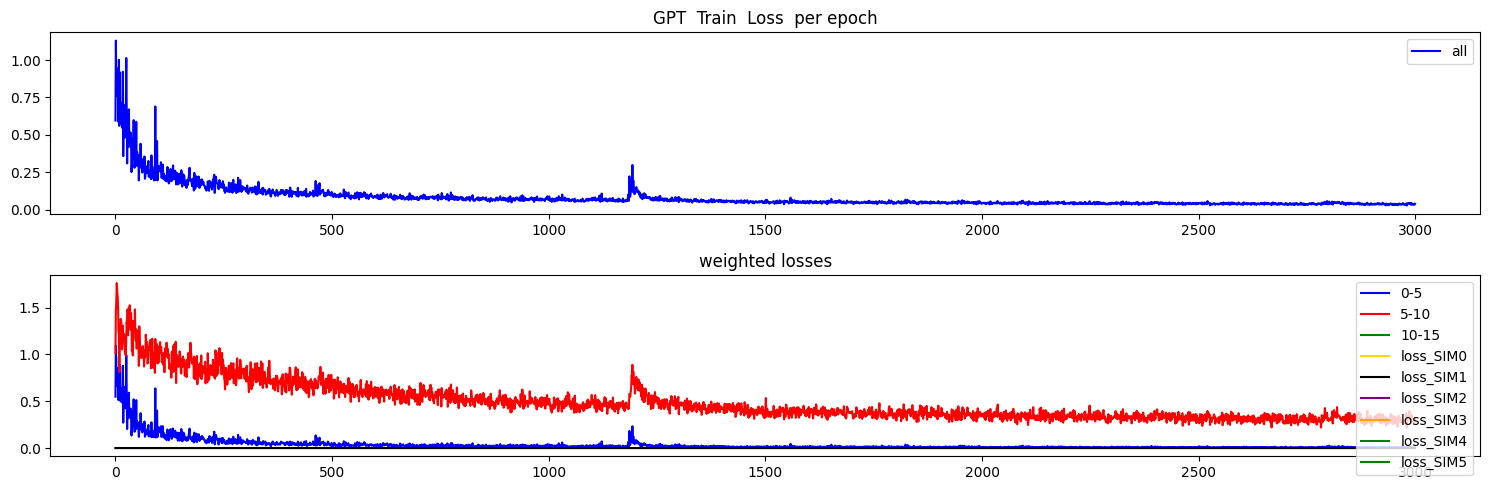

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


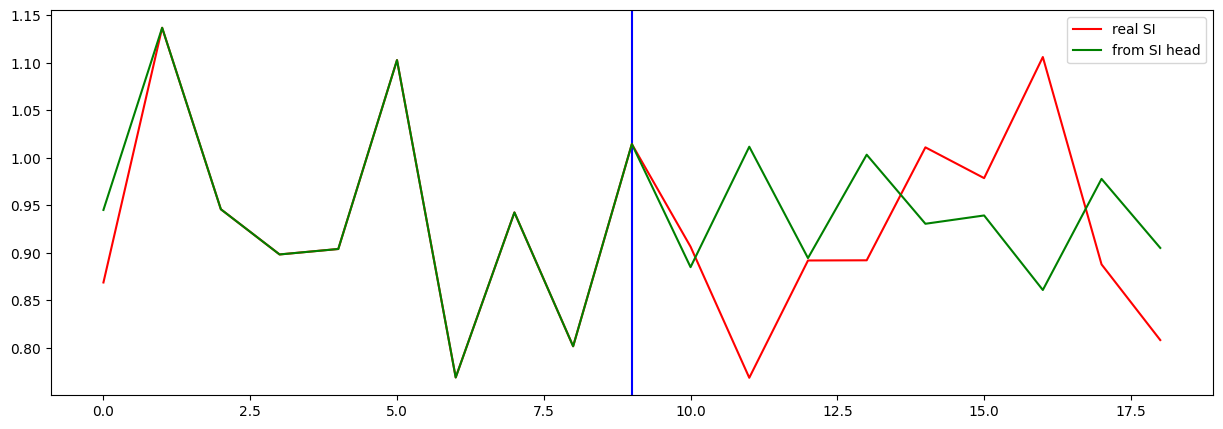

Testing R**2 - (all) - (no inputs):  0.9830043320931172
Testing R**2 - (f2) - SI full (no inputs):  -0.9995700424962803
Testing R**2 - SI head only (no inputs):  -0.027355533851515235
0 ...index R**2 (no inputs):  -0.047676050654553936
1 ...index R**2 (no inputs):  0.09135011377183411
2 ...index R**2 (no inputs):  -0.9995700424962803
3 ...index R**2 (no inputs):  -3.1381515647847262
4 ...index R**2 (no inputs):  -27.683185600344764
5 ...index R**2 (no inputs):  -14.17179105159563
6 ...index R**2 (no inputs):  -0.6497658080578192
7 ...index R**2 (no inputs):  -0.5884753697331422
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.15449393945297007
10 ...index R**2 (no inputs):  -0.521399191868158
11 ...index R**2 (no inputs):  -1.2146988348654673
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -6.4179346947401
16 ...index R**2 (no inputs):  -1.5071546676652372
17 ...index R**2 (no input

In [30]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk300to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 0.775102
Loss_SI: 0.69237220287323 Loss_all: 1.5196715593338013
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.220577
Loss_SI: 0.15018722414970398 Loss_all: 0.8540835976600647
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.103182
Loss_SI: 0.053251996636390686 Loss_all: 0.5525473356246948
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.081090
Loss_SI: 0.029778260737657547 Loss_all: 0.5428932309150696
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.070947
Loss_SI: 0.014993727207183838 Loss_all: 0.5745239853858948
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.060899
Loss_SI: 0.01743081957101822 Loss_all: 0.4521169066429138
Prediction shape: torch.Size([32, 35])
===


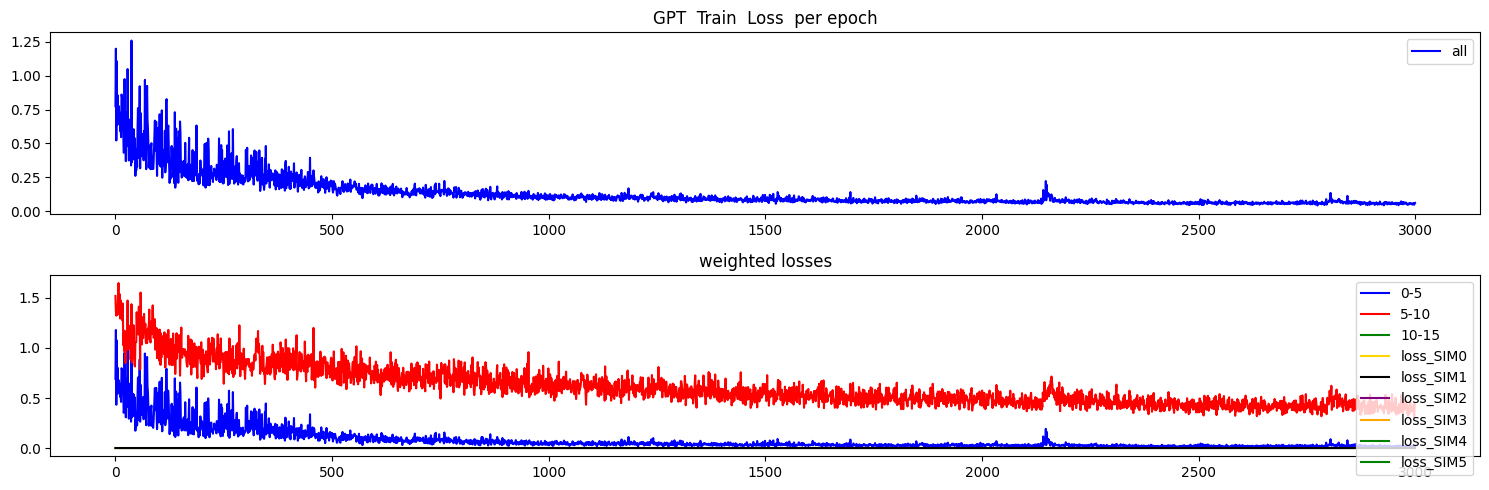

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


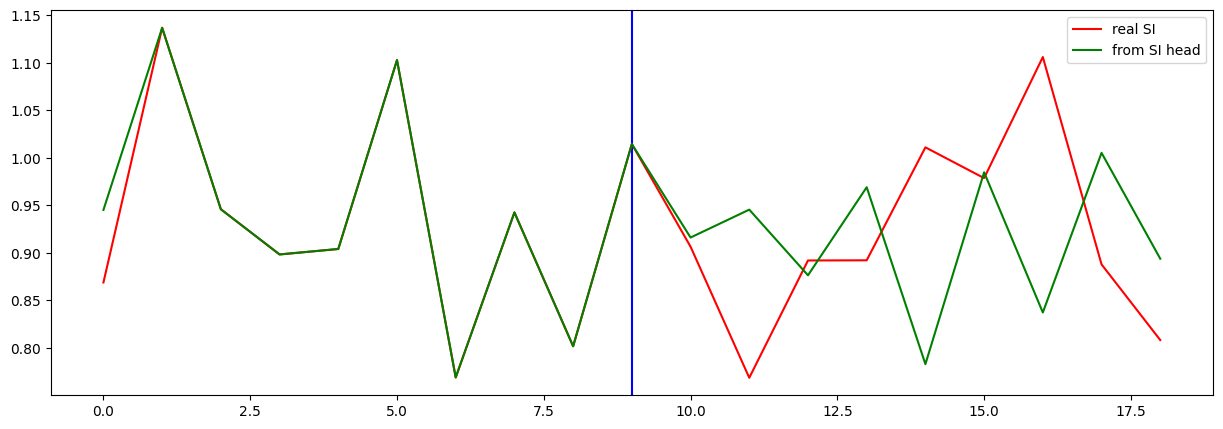

Testing R**2 - (all) - (no inputs):  0.9918018963358366
Testing R**2 - (f2) - SI full (no inputs):  -1.624974308795021
Testing R**2 - SI head only (no inputs):  -0.40671818785640523
0 ...index R**2 (no inputs):  -1.1408518264585776
1 ...index R**2 (no inputs):  -1.0838342395124783
2 ...index R**2 (no inputs):  -1.624974308795021
3 ...index R**2 (no inputs):  -0.9789525221798774
4 ...index R**2 (no inputs):  -6.141115044412884
5 ...index R**2 (no inputs):  -6.28697429872963
6 ...index R**2 (no inputs):  -1.8880792967300386
7 ...index R**2 (no inputs):  -0.8808126926592839
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.942643497071139
10 ...index R**2 (no inputs):  -0.4468997263703114
11 ...index R**2 (no inputs):  -4.286600013356374
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -15.062202365731181
16 ...index R**2 (no inputs):  -1.2798351636478813
17 ...index R**2 (no inputs):  

In [31]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk200to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 0.829201
Loss_SI: 0.7296217679977417 Loss_all: 1.7254185676574707
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.231216
Loss_SI: 0.14155101776123047 Loss_all: 1.0381975173950195
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.218144
Loss_SI: 0.15878728032112122 Loss_all: 0.7523512244224548
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.100768
Loss_SI: 0.051303401589393616 Loss_all: 0.5459489226341248
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.053251
Loss_SI: 0.017770947888493538 Loss_all: 0.3725697994232178
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.058993
Loss_SI: 0.024464191868901253 Loss_all: 0.3697563707828522
Prediction shape: torch.Size([32, 35])
===


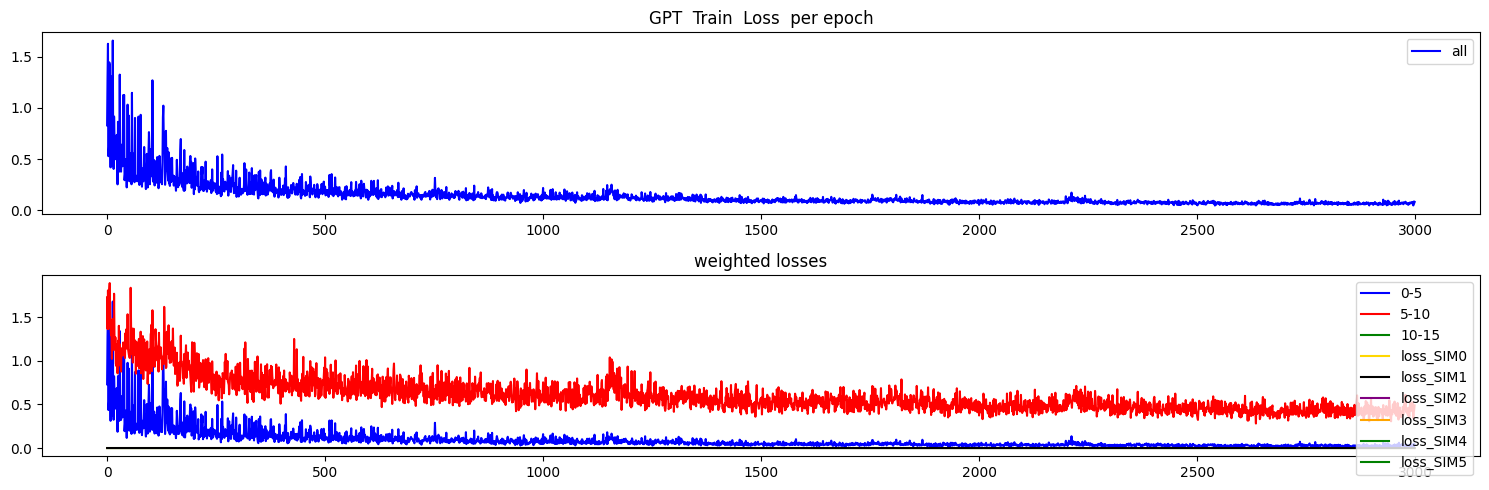

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


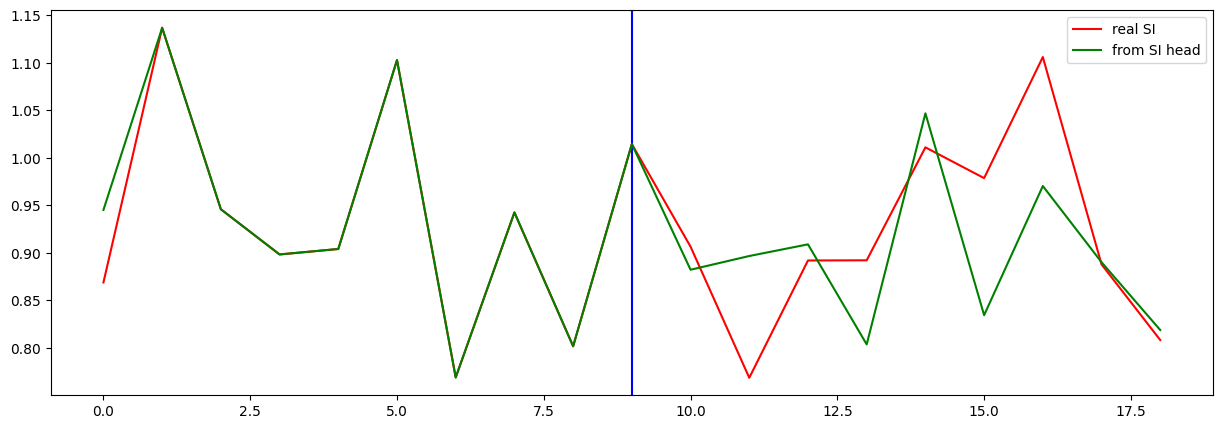

Testing R**2 - (all) - (no inputs):  0.987776561296941
Testing R**2 - (f2) - SI full (no inputs):  -0.6633865392384226
Testing R**2 - SI head only (no inputs):  -0.7421530900300133
0 ...index R**2 (no inputs):  0.030989876316574683
1 ...index R**2 (no inputs):  -2.0828129393969843
2 ...index R**2 (no inputs):  -0.6633865392384226
3 ...index R**2 (no inputs):  -3.2558990218608894
4 ...index R**2 (no inputs):  -765.9594363303755
5 ...index R**2 (no inputs):  -9.704158394400288
6 ...index R**2 (no inputs):  -1.352688781537167
7 ...index R**2 (no inputs):  -1.013560883474525
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.38407501617663997
10 ...index R**2 (no inputs):  -0.06885079119676418
11 ...index R**2 (no inputs):  -9.092637143429322
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -4.5293654418467355
16 ...index R**2 (no inputs):  -0.41725027113338564
17 ...index R**2 (no inputs

In [32]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk100to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 0.691725
Loss_SI: 0.6351140737533569 Loss_all: 1.2012243270874023
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.306475
Loss_SI: 0.2057207077741623 Loss_all: 1.2132631540298462
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.139485
Loss_SI: 0.08512763679027557 Loss_all: 0.6286985278129578
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.204107
Loss_SI: 0.1595294326543808 Loss_all: 0.6053031086921692
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.137917
Loss_SI: 0.09621572494506836 Loss_all: 0.513231635093689
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.121422
Loss_SI: 0.07343947887420654 Loss_all: 0.5532618165016174
Prediction shape: torch.Size([32, 35])
===


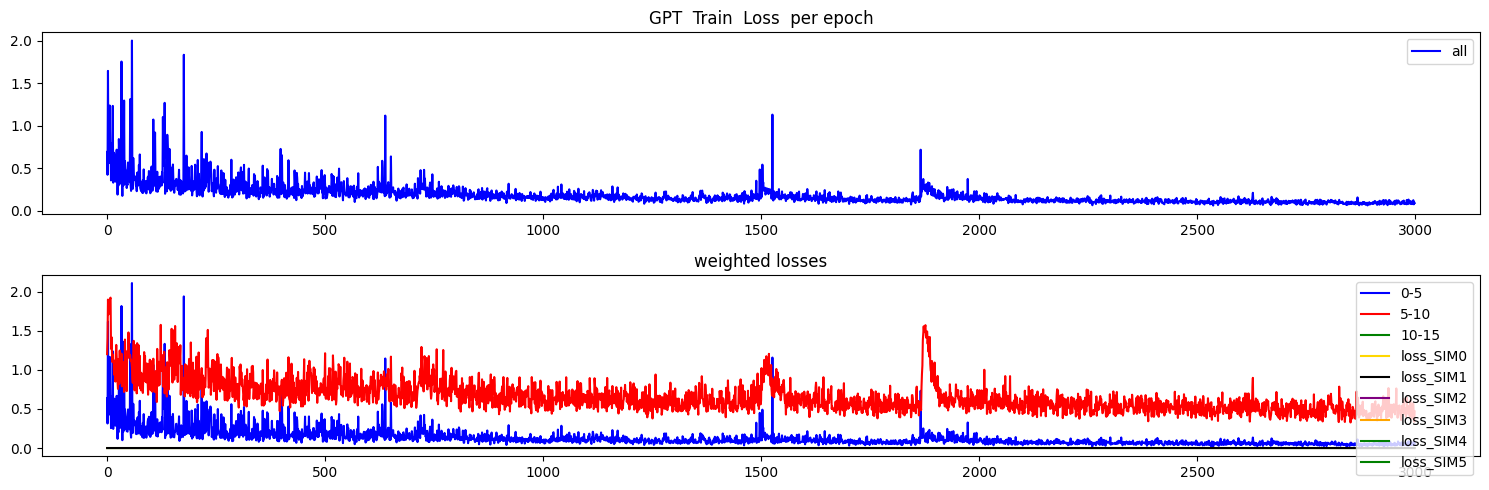

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


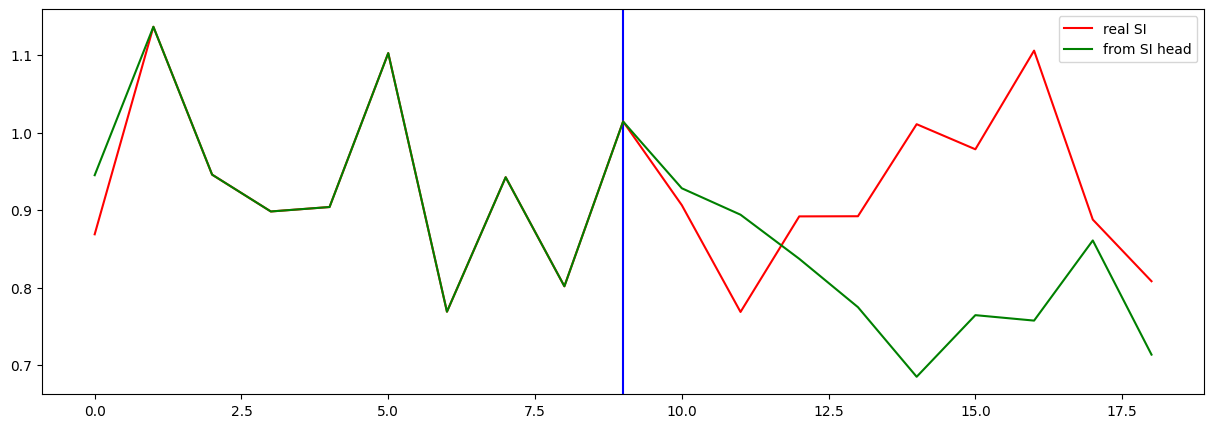

Testing R**2 - (all) - (no inputs):  0.9644763901491493
Testing R**2 - (f2) - SI full (no inputs):  -6.501974349430935
Testing R**2 - SI head only (no inputs):  -2.830970243948817
0 ...index R**2 (no inputs):  -0.42296100533367875
1 ...index R**2 (no inputs):  -0.7920350567639936
2 ...index R**2 (no inputs):  -6.501974349430935
3 ...index R**2 (no inputs):  -0.7242859814796443
4 ...index R**2 (no inputs):  -590.4266676433643
5 ...index R**2 (no inputs):  -28.043038805153287
6 ...index R**2 (no inputs):  -15.068591034224983
7 ...index R**2 (no inputs):  -1.0488302023251124
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.01237983171104784
10 ...index R**2 (no inputs):  -1.1444220582575158
11 ...index R**2 (no inputs):  -148.77746646235815
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -7.588613873656602
16 ...index R**2 (no inputs):  -1.6481808283750268
17 ...index R**2 (no inputs):

In [33]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk000to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 3


In [34]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.911357
Loss_SI: 0.8606072664260864 Loss_all: 1.3681011199951172
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.094095
Loss_SI: 0.03035116195678711 Loss_all: 0.6677875518798828
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.076137
Loss_SI: 0.03138389438390732 Loss_all: 0.4789198040962219
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.049841
Loss_SI: 0.015150323510169983 Loss_all: 0.3620528280735016
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.041470
Loss_SI: 0.010784214362502098 Loss_all: 0.31764090061187744
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.046904
Loss_SI: 0.01629663072526455 Loss_all: 0.32236936688423157
Prediction shape: torch.Size([32, 35])
===


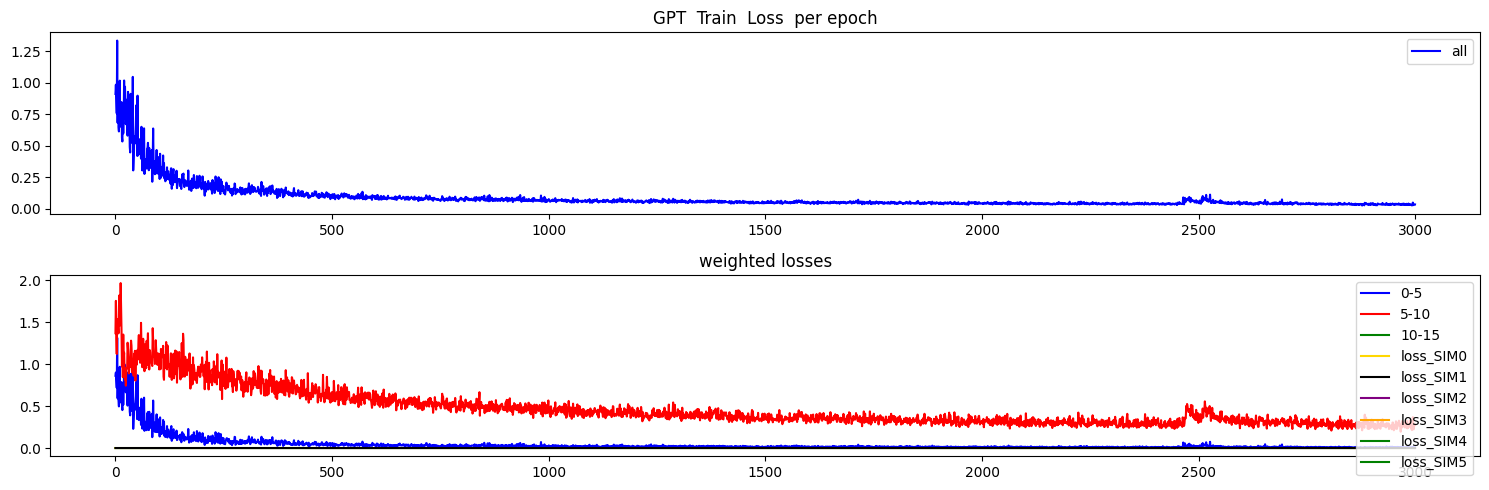

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


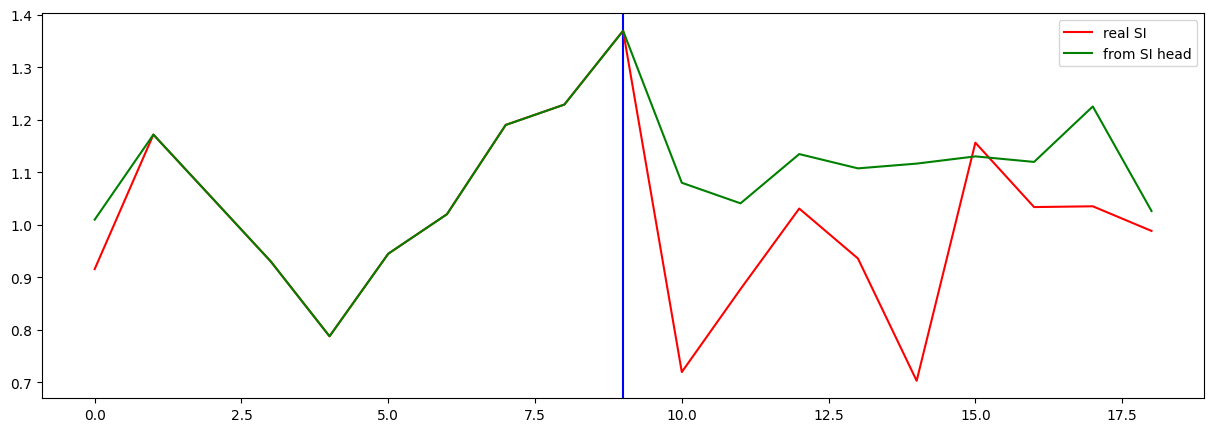

Testing R**2 - (all) - (no inputs):  0.8639547947449641
Testing R**2 - (f2) - SI full (no inputs):  -2.7852044602158648
Testing R**2 - SI head only (no inputs):  -1.5290413925281827
0 ...index R**2 (no inputs):  -0.5577778521903063
1 ...index R**2 (no inputs):  -2.3168399803578392
2 ...index R**2 (no inputs):  -2.7852044602158648
3 ...index R**2 (no inputs):  -2.26918708759048
4 ...index R**2 (no inputs):  -0.30566087423412625
5 ...index R**2 (no inputs):  -6.380593098113335
6 ...index R**2 (no inputs):  -0.5469108124373552
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.7754505363472801
10 ...index R**2 (no inputs):  -5.20851408748743
11 ...index R**2 (no inputs):  -9.816813878073352
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.6229784412702304
16 ...index R**2 (no inputs):  -0.31196256775363373
17 ...index R**2 (no inputs):  -2.64854440102

In [35]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                           chunk300to400_train,
                           reasoning_steps=10,
                           backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )

[0] Train Loss: 0.702157
Loss_SI: 0.670448899269104 Loss_all: 0.9875270128250122
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.205611
Loss_SI: 0.13286921381950378 Loss_all: 0.8602861762046814
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.128328
Loss_SI: 0.050386279821395874 Loss_all: 0.8298044800758362
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.088660
Loss_SI: 0.028687650337815285 Loss_all: 0.62840735912323
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.072698
Loss_SI: 0.034332722425460815 Loss_all: 0.41798102855682373
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.061872
Loss_SI: 0.022157756611704826 Loss_all: 0.4193047285079956
Prediction shape: torch.Size([32, 35])
===


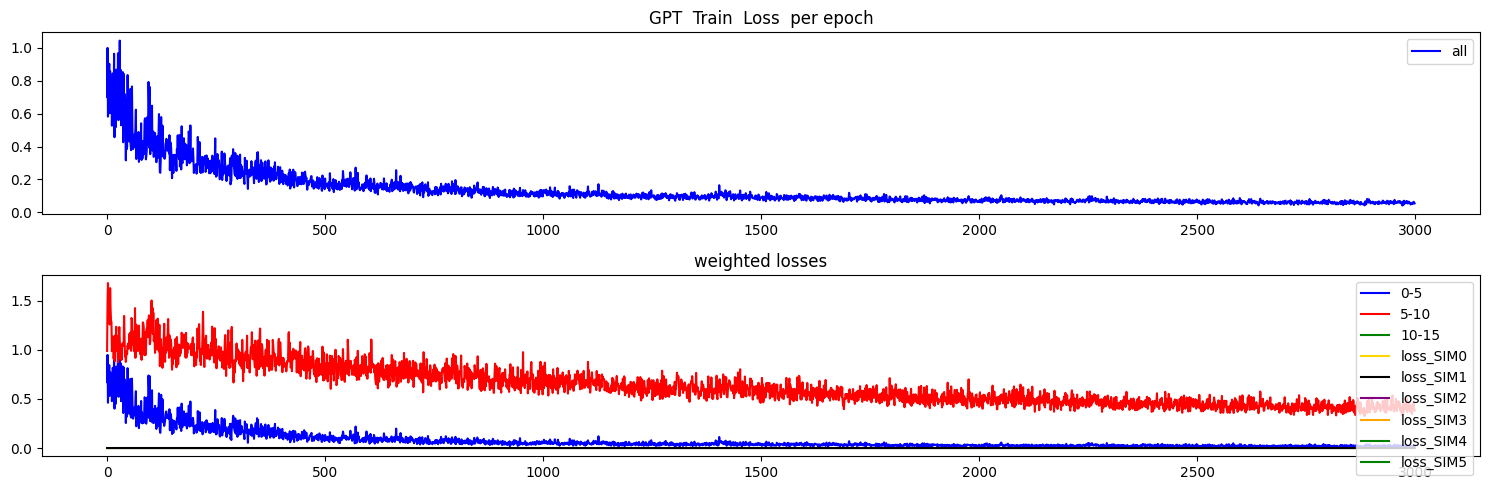

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


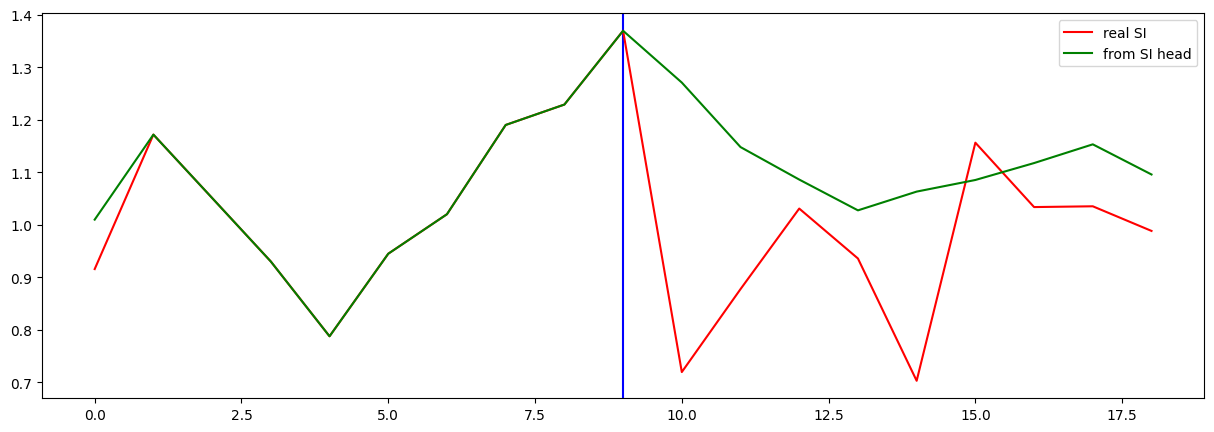

Testing R**2 - (all) - (no inputs):  0.9529474985406649
Testing R**2 - (f2) - SI full (no inputs):  -2.40908767197613
Testing R**2 - SI head only (no inputs):  -1.8606201329743364
0 ...index R**2 (no inputs):  -0.4305775101906941
1 ...index R**2 (no inputs):  -4.749189351545496
2 ...index R**2 (no inputs):  -2.40908767197613
3 ...index R**2 (no inputs):  -3.1027367128297945
4 ...index R**2 (no inputs):  -0.2274045454969289
5 ...index R**2 (no inputs):  -1.5520114544032793
6 ...index R**2 (no inputs):  -0.2729710285001028
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.9677345235860395
10 ...index R**2 (no inputs):  -2.328530573077375
11 ...index R**2 (no inputs):  -43.99850357402319
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.1006356517223748
16 ...index R**2 (no inputs):  -3.4875987234926624
17 ...index R**2 (no inputs):  -68.7120747100419

In [36]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk200to400_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )

[0] Train Loss: 0.498811
Loss_SI: 0.4318113625049591 Loss_all: 1.1018081903457642
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.283726
Loss_SI: 0.19284959137439728 Loss_all: 1.1016110181808472
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.156082
Loss_SI: 0.08921580761671066 Loss_all: 0.7578771710395813
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.135294
Loss_SI: 0.05509595572948456 Loss_all: 0.8570741415023804
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.081443
Loss_SI: 0.03137969970703125 Loss_all: 0.5320133566856384
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.089508
Loss_SI: 0.04328674450516701 Loss_all: 0.5055027008056641
Prediction shape: torch.Size([32, 35])
===


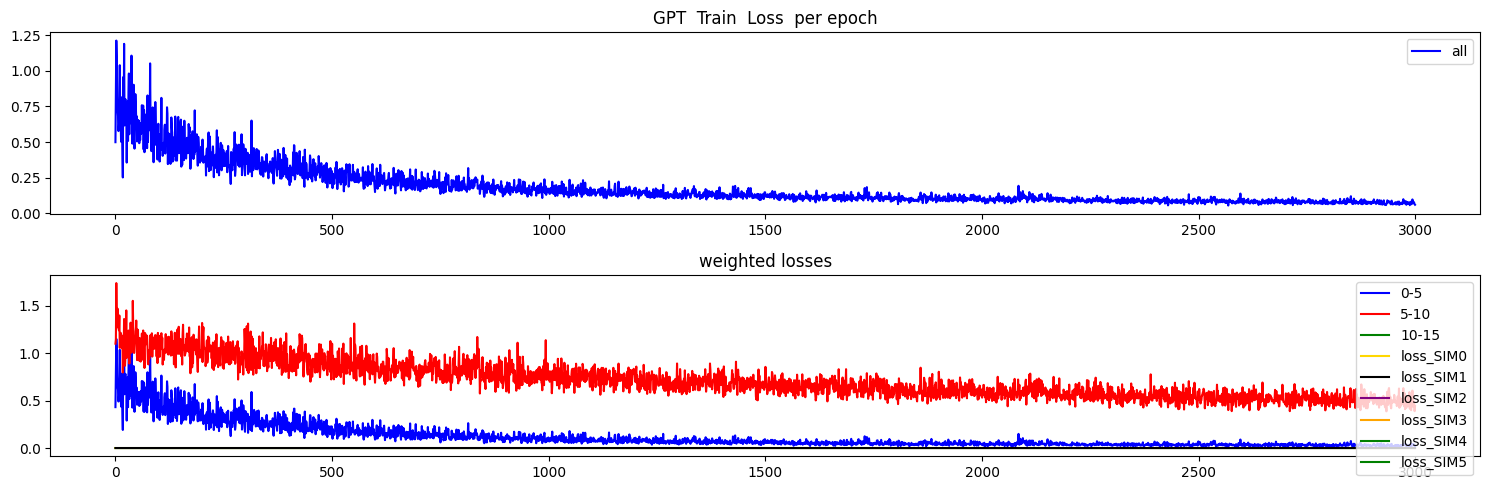

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


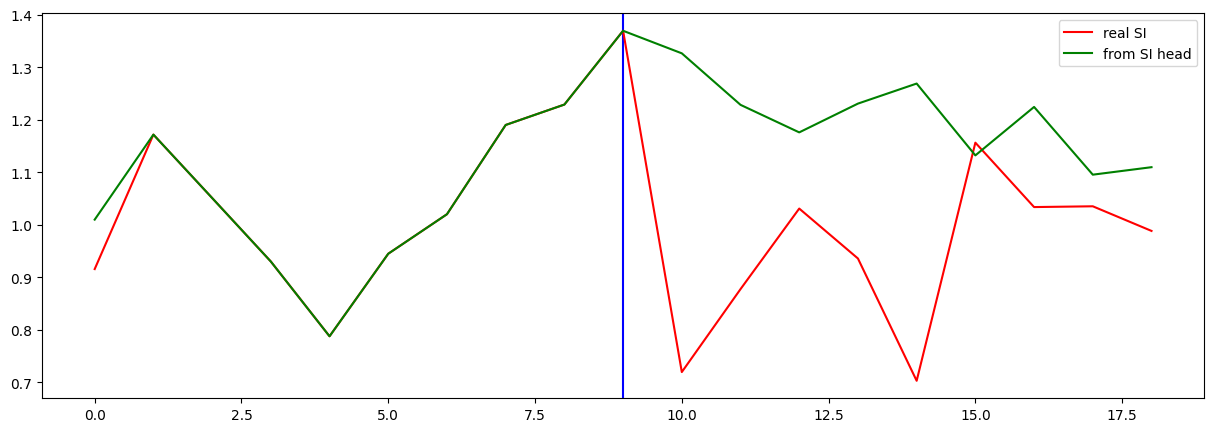

Testing R**2 - (all) - (no inputs):  0.973769834890657
Testing R**2 - (f2) - SI full (no inputs):  -7.058424558628747
Testing R**2 - SI head only (no inputs):  -4.231864115194877
0 ...index R**2 (no inputs):  -0.0808970597379306
1 ...index R**2 (no inputs):  -4.601325974519679
2 ...index R**2 (no inputs):  -7.058424558628747
3 ...index R**2 (no inputs):  -0.11515127481541976
4 ...index R**2 (no inputs):  -0.2849210112157061
5 ...index R**2 (no inputs):  -0.40461684156434297
6 ...index R**2 (no inputs):  -0.5707095479709849
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.3116562439352957
10 ...index R**2 (no inputs):  -0.8692785458091343
11 ...index R**2 (no inputs):  -104.50482486419084
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.0805771591995161
16 ...index R**2 (no inputs):  -1.6456651494060894
17 ...index R**2 (no inputs):  -910.91662095

In [37]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk100to400_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )

[0] Train Loss: 0.488691
Loss_SI: 0.4344671368598938 Loss_all: 0.9767094254493713
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.263132
Loss_SI: 0.20159441232681274 Loss_all: 0.816966712474823
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.205301
Loss_SI: 0.14120322465896606 Loss_all: 0.7821828722953796
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.096341
Loss_SI: 0.04482172057032585 Loss_all: 0.5600154399871826
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.117142
Loss_SI: 0.06344698369503021 Loss_all: 0.6003989577293396
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.078430
Loss_SI: 0.0361236073076725 Loss_all: 0.4591875374317169
Prediction shape: torch.Size([32, 35])
===


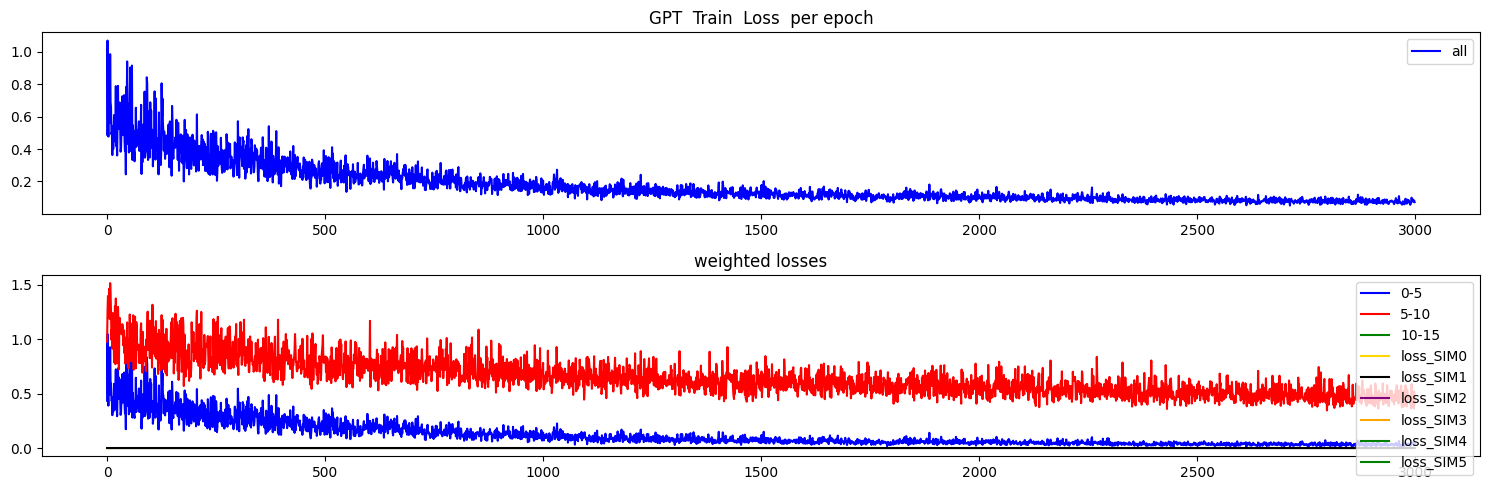

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


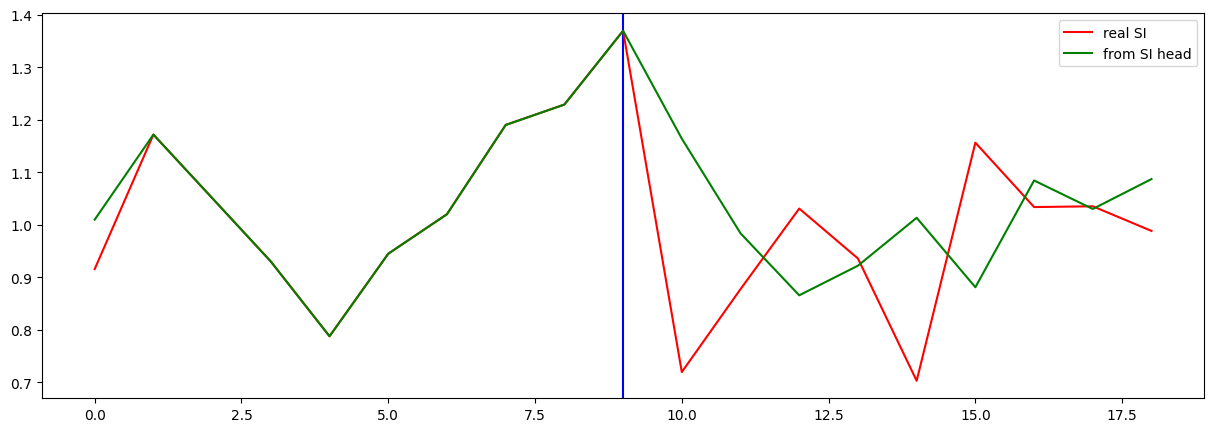

Testing R**2 - (all) - (no inputs):  0.8420949676068112
Testing R**2 - (f2) - SI full (no inputs):  -3.9029623091971457
Testing R**2 - SI head only (no inputs):  -0.6407221781567449
0 ...index R**2 (no inputs):  -1.586294538305118
1 ...index R**2 (no inputs):  -2.7635869620407147
2 ...index R**2 (no inputs):  -3.9029623091971457
3 ...index R**2 (no inputs):  -16.37239065917014
4 ...index R**2 (no inputs):  -0.9117608245714175
5 ...index R**2 (no inputs):  -7.541045422733683
6 ...index R**2 (no inputs):  -0.49717497640113106
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.6818620635562684
10 ...index R**2 (no inputs):  -0.7546560860140328
11 ...index R**2 (no inputs):  -162.93484890293854
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -3.3700953223591217
16 ...index R**2 (no inputs):  -6.153645021136501
17 ...index R**2 (no inputs):  -2620.8259301

In [38]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk000to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )


## Run 4


In [39]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.664326
Loss_SI: 0.5931823253631592 Loss_all: 1.304621696472168
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.127176
Loss_SI: 0.07535994052886963 Loss_all: 0.5935232639312744
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.055277
Loss_SI: 0.014539157971739769 Loss_all: 0.4219224154949188
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.053867
Loss_SI: 0.02104809693992138 Loss_all: 0.3492412567138672
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.038795
Loss_SI: 0.01258806698024273 Loss_all: 0.2746583819389343
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.033905
Loss_SI: 0.010608341544866562 Loss_all: 0.24357789754867554
Prediction shape: torch.Size([32, 35])
===


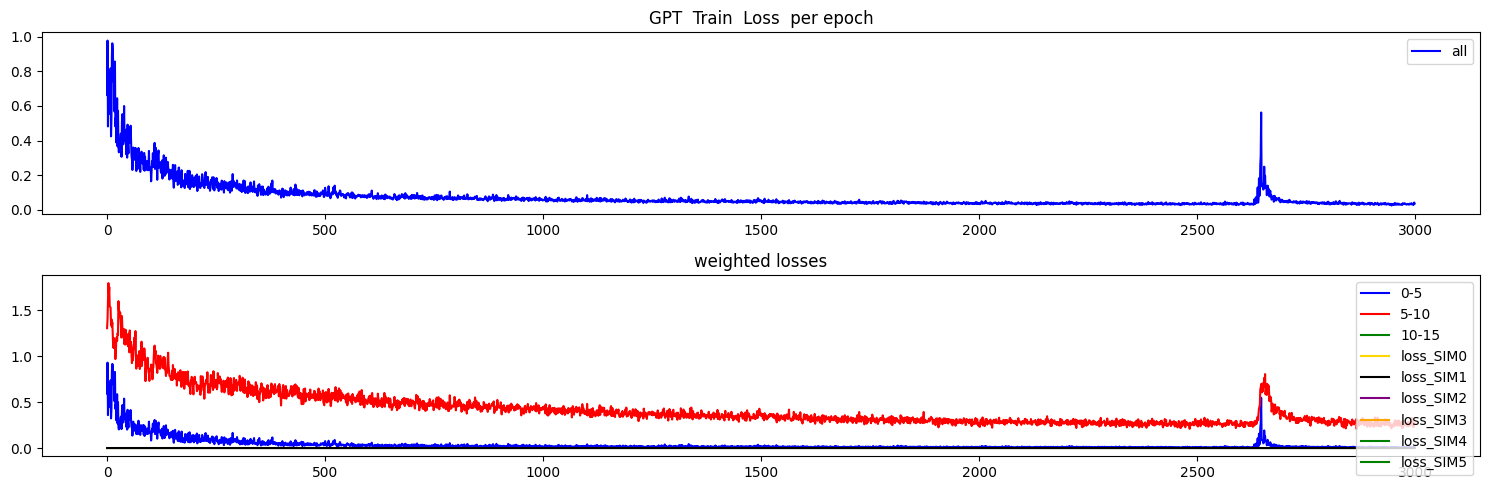

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


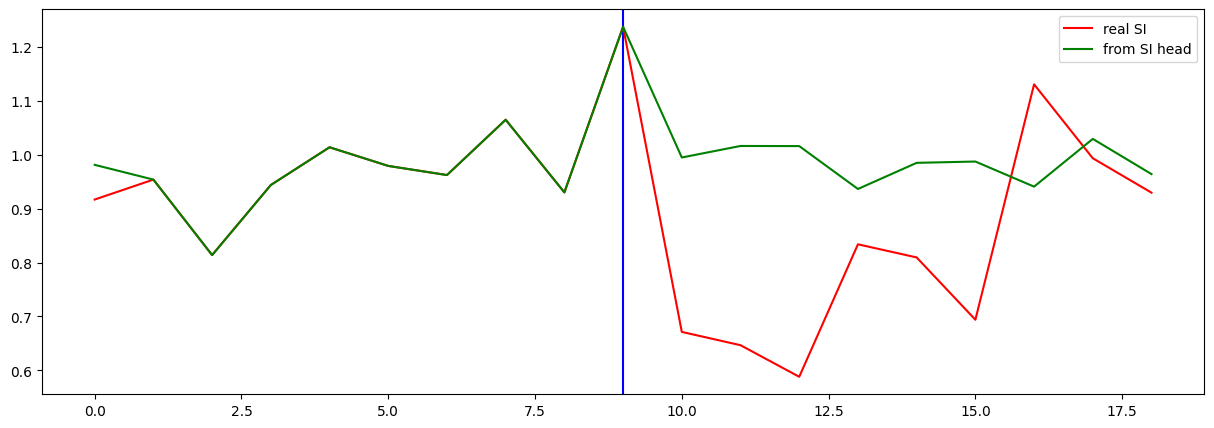

Testing R**2 - (all) - (no inputs):  0.8274667119631445
Testing R**2 - (f2) - SI full (no inputs):  -1.1218958665915988
Testing R**2 - SI head only (no inputs):  -0.9345393126581509
0 ...index R**2 (no inputs):  -0.36011398279995555
1 ...index R**2 (no inputs):  -1.714633107630247
2 ...index R**2 (no inputs):  -1.1218958665915988
3 ...index R**2 (no inputs):  -5.336012541524687
4 ...index R**2 (no inputs):  -3.480119277305259
5 ...index R**2 (no inputs):  -4.356943583155793
6 ...index R**2 (no inputs):  0.2501571584154234
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.665627355139609
10 ...index R**2 (no inputs):  -0.07346394018450764
11 ...index R**2 (no inputs):  -51.615624841432016
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.616754419714151
16 ...index R**2 (no inputs):  -2.297549997745277
17 ...index R**2 (no inputs):  -4.3931897143369

In [40]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk300to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )

[0] Train Loss: 0.387493
Loss_SI: 0.29467248916625977 Loss_all: 1.2228803634643555
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.157651
Loss_SI: 0.10920263826847076 Loss_all: 0.5936837196350098
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.084700
Loss_SI: 0.034907013177871704 Loss_all: 0.5328341126441956
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.078336
Loss_SI: 0.023840924724936485 Loss_all: 0.5687916874885559
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.065977
Loss_SI: 0.025485754013061523 Loss_all: 0.4303976893424988
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.058691
Loss_SI: 0.023090161383152008 Loss_all: 0.37909483909606934
Prediction shape: torch.Size([32, 35])
===


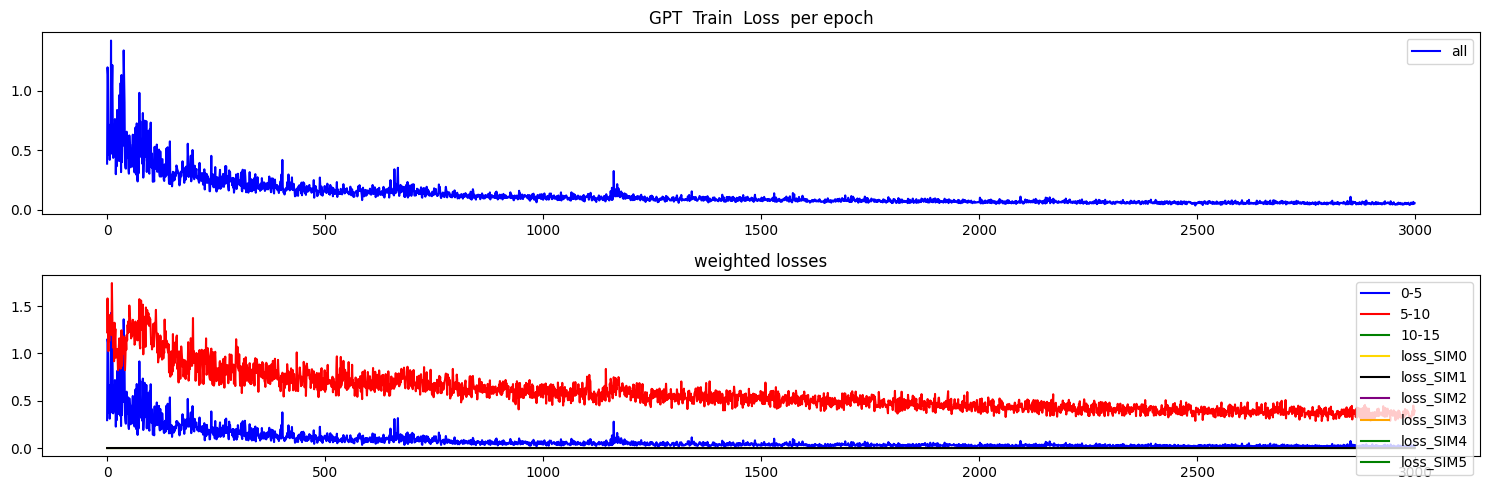

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


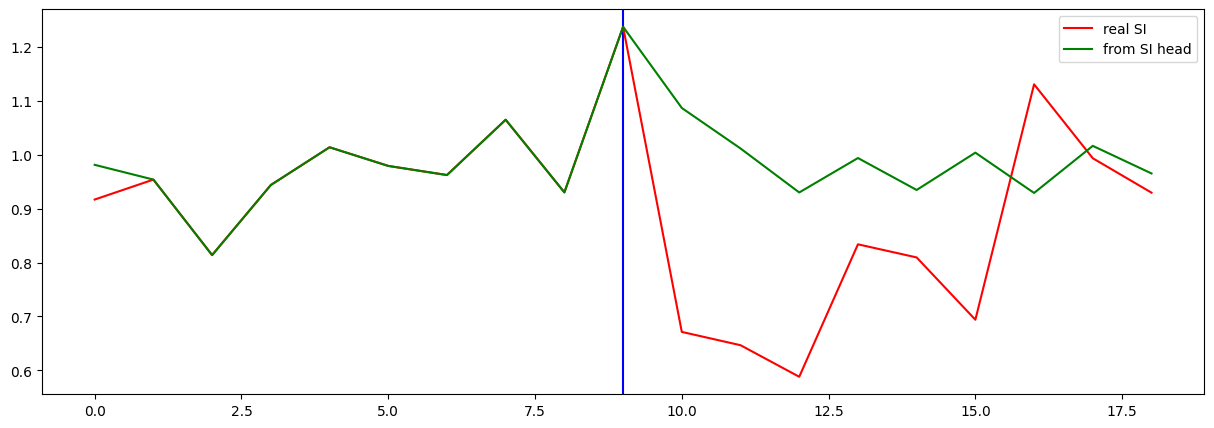

Testing R**2 - (all) - (no inputs):  0.8401406137436054
Testing R**2 - (f2) - SI full (no inputs):  -1.494254144731669
Testing R**2 - SI head only (no inputs):  -1.0579744216566898
0 ...index R**2 (no inputs):  -0.3497792461396114
1 ...index R**2 (no inputs):  -5.546646598357534
2 ...index R**2 (no inputs):  -1.494254144731669
3 ...index R**2 (no inputs):  -3.2467029021877893
4 ...index R**2 (no inputs):  -4.326327722778923
5 ...index R**2 (no inputs):  -3.958692943377711
6 ...index R**2 (no inputs):  0.3322754815800474
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.15458691265782742
10 ...index R**2 (no inputs):  -0.03902231234234654
11 ...index R**2 (no inputs):  -2.7357692282783987
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.8718747675771095
16 ...index R**2 (no inputs):  -2.720796394502915
17 ...index R**2 (no inputs):  -130.37527804271

In [41]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk200to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )

[0] Train Loss: 0.400929
Loss_SI: 0.3043643832206726 Loss_all: 1.2700108289718628
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.453846
Loss_SI: 0.4115857481956482 Loss_all: 0.8341848850250244
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.135672
Loss_SI: 0.07154810428619385 Loss_all: 0.7127898335456848
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.103209
Loss_SI: 0.04506567865610123 Loss_all: 0.6264972686767578
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.104320
Loss_SI: 0.04271411895751953 Loss_all: 0.6587721109390259
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.087619
Loss_SI: 0.04017920792102814 Loss_all: 0.514582097530365
Prediction shape: torch.Size([32, 35])
===


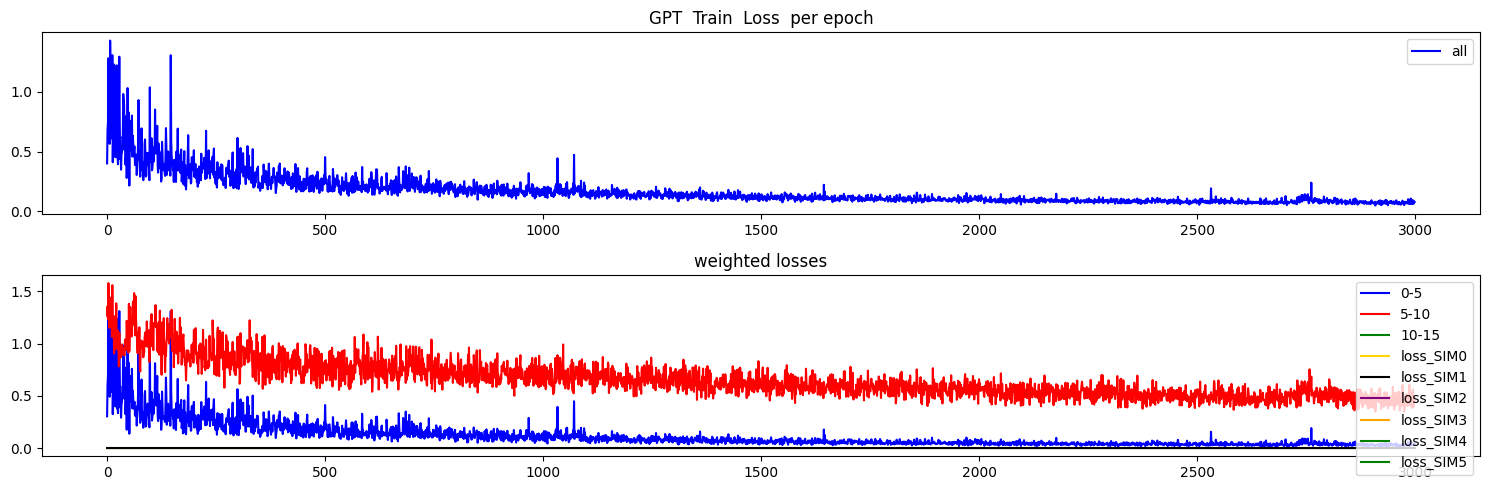

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


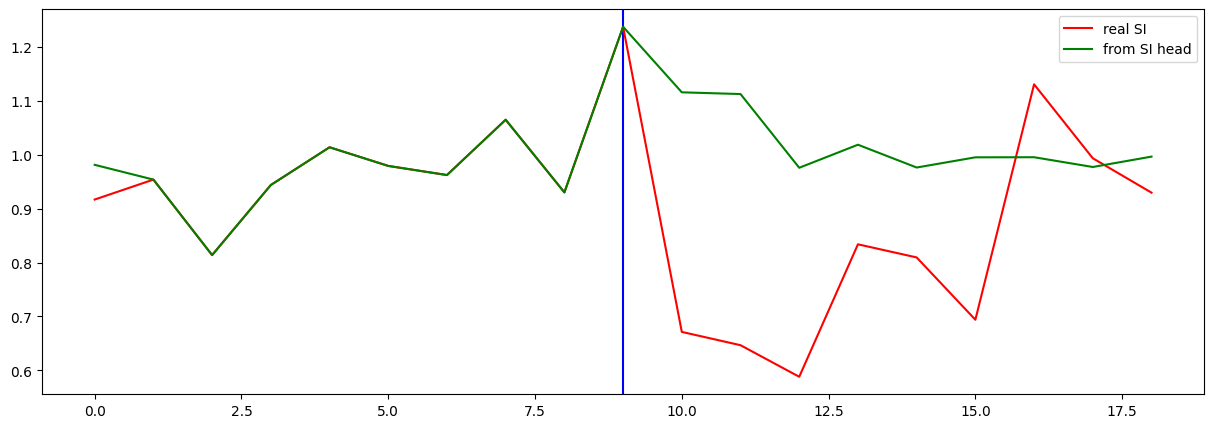

Testing R**2 - (all) - (no inputs):  0.7862519502192685
Testing R**2 - (f2) - SI full (no inputs):  -3.42111661733178
Testing R**2 - SI head only (no inputs):  -1.7165293361470955
0 ...index R**2 (no inputs):  -0.28101637302526683
1 ...index R**2 (no inputs):  -9.45771099130592
2 ...index R**2 (no inputs):  -3.42111661733178
3 ...index R**2 (no inputs):  -4.256137962164034
4 ...index R**2 (no inputs):  -3.2224595738872956
5 ...index R**2 (no inputs):  -5.640828524314386
6 ...index R**2 (no inputs):  0.0611231772001396
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.31013045135638073
10 ...index R**2 (no inputs):  -0.11151121905097705
11 ...index R**2 (no inputs):  -5.284835616457888
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -4.000890792853808
16 ...index R**2 (no inputs):  -0.22544846495754634
17 ...index R**2 (no inputs):  -10.9325545036153

In [42]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                              chunk100to400_train,
                              reasoning_steps=10,
                              backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )

[0] Train Loss: 0.426733
Loss_SI: 0.326709121465683 Loss_all: 1.3269485235214233
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.270413
Loss_SI: 0.21428704261779785 Loss_all: 0.7755430340766907
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.270085
Loss_SI: 0.20628461241722107 Loss_all: 0.8442884683609009
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.160690
Loss_SI: 0.09963507950305939 Loss_all: 0.7101851105690002
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.118683
Loss_SI: 0.061944134533405304 Loss_all: 0.6293367147445679
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.082919
Loss_SI: 0.03976009041070938 Loss_all: 0.4713493585586548
Prediction shape: torch.Size([32, 35])
===


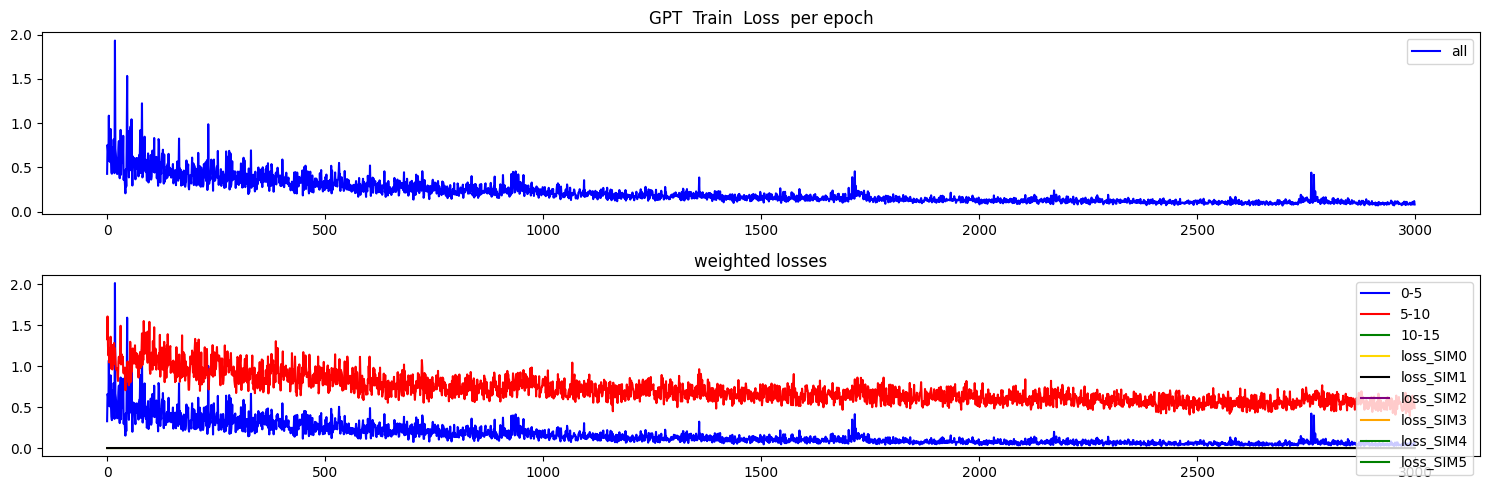

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


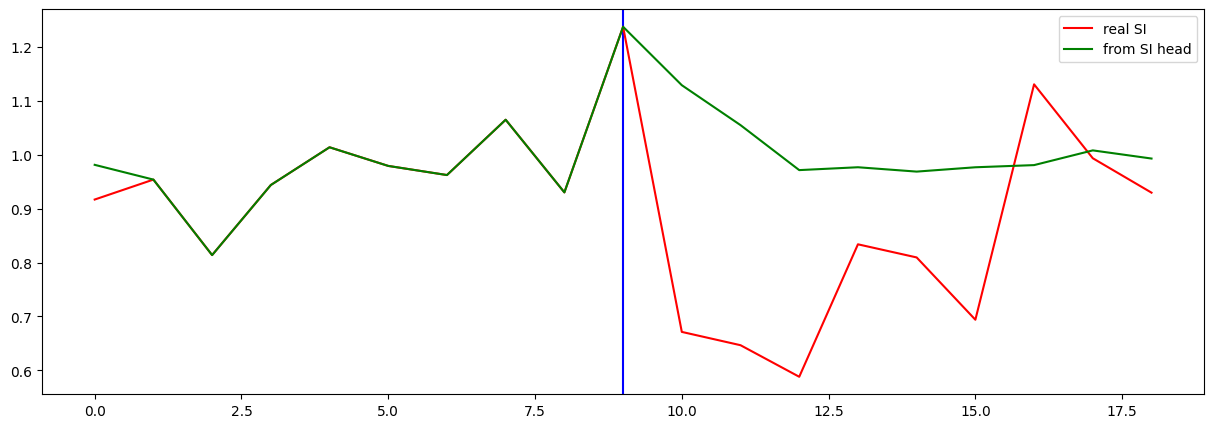

Testing R**2 - (all) - (no inputs):  0.8326842103383947
Testing R**2 - (f2) - SI full (no inputs):  -2.8248659139899877
Testing R**2 - SI head only (no inputs):  -1.4842913247688312
0 ...index R**2 (no inputs):  -0.057894359165547415
1 ...index R**2 (no inputs):  -3.8075882856299
2 ...index R**2 (no inputs):  -2.8248659139899877
3 ...index R**2 (no inputs):  -3.416144106477855
4 ...index R**2 (no inputs):  -1.290366488818429
5 ...index R**2 (no inputs):  -4.196959907542662
6 ...index R**2 (no inputs):  -0.05986638445239989
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.21994333217042428
10 ...index R**2 (no inputs):  0.1437845843565928
11 ...index R**2 (no inputs):  -27.344849929312705
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.764492149369726
16 ...index R**2 (no inputs):  -0.39552160833997974
17 ...index R**2 (no inputs):  -570.83885620

In [43]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk000to400_train, 
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )


## Run 5


In [44]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.482140
Loss_SI: 0.3888694643974304 Loss_all: 1.3215795755386353
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.095603
Loss_SI: 0.042105354368686676 Loss_all: 0.5770796537399292
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.048481
Loss_SI: 0.014627625234425068 Loss_all: 0.35316014289855957
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.048958
Loss_SI: 0.016789110377430916 Loss_all: 0.33848297595977783
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.032837
Loss_SI: 0.007202552631497383 Loss_all: 0.2635493576526642
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.029387
Loss_SI: 0.008777805604040623 Loss_all: 0.21486613154411316
Prediction shape: torch.Size([32, 35])
===


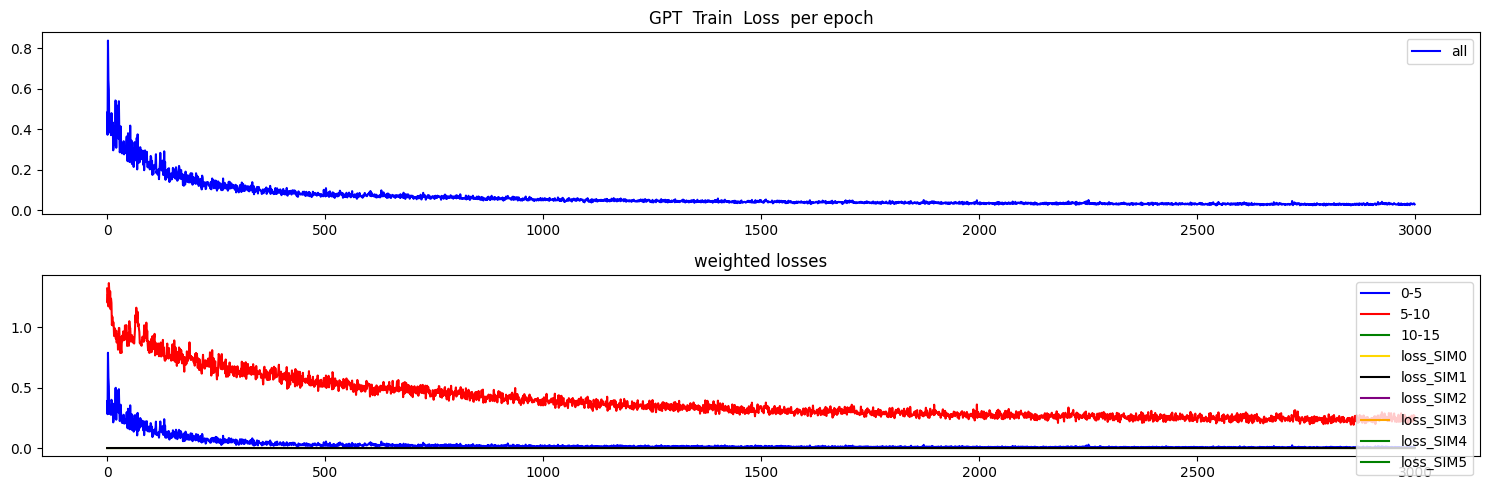

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


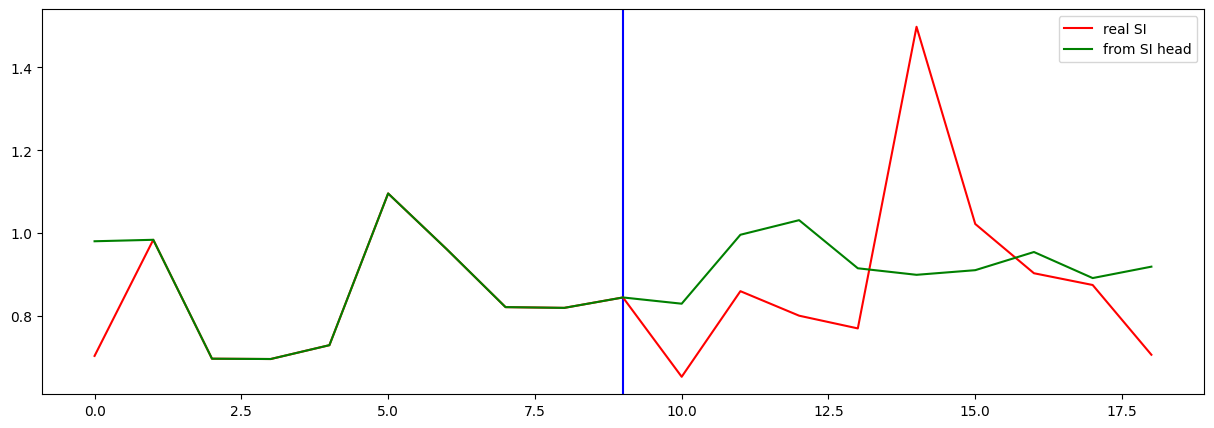

Testing R**2 - (all) - (no inputs):  0.978485617664962
Testing R**2 - (f2) - SI full (no inputs):  0.13230422385396723
Testing R**2 - SI head only (no inputs):  -0.150319509032123
0 ...index R**2 (no inputs):  0.312032630912911
1 ...index R**2 (no inputs):  -0.5341903742480836
2 ...index R**2 (no inputs):  0.13230422385396723
3 ...index R**2 (no inputs):  -882.2379128624275
4 ...index R**2 (no inputs):  -477.9841143480836
5 ...index R**2 (no inputs):  -26.07777646025087
6 ...index R**2 (no inputs):  -7.070842107163868
7 ...index R**2 (no inputs):  -94.98736769630611
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.01958574485779674
10 ...index R**2 (no inputs):  0.120758165502733
11 ...index R**2 (no inputs):  -732.2120301421827
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.6420575003175066
16 ...index R**2 (no inputs):  -1.4050355400298593
17 ...index R**2 (no inputs):  -37.3

In [45]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk300to400_train,
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 0.710813
Loss_SI: 0.6276201605796814 Loss_all: 1.4595445394515991
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.155745
Loss_SI: 0.09979928284883499 Loss_all: 0.6592572927474976
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.086005
Loss_SI: 0.041360028088092804 Loss_all: 0.48780491948127747
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.050565
Loss_SI: 0.017831720411777496 Loss_all: 0.3451666533946991
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.053185
Loss_SI: 0.017548201605677605 Loss_all: 0.3739166259765625
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.053398
Loss_SI: 0.020415915176272392 Loss_all: 0.35023897886276245
Prediction shape: torch.Size([32, 35])
===


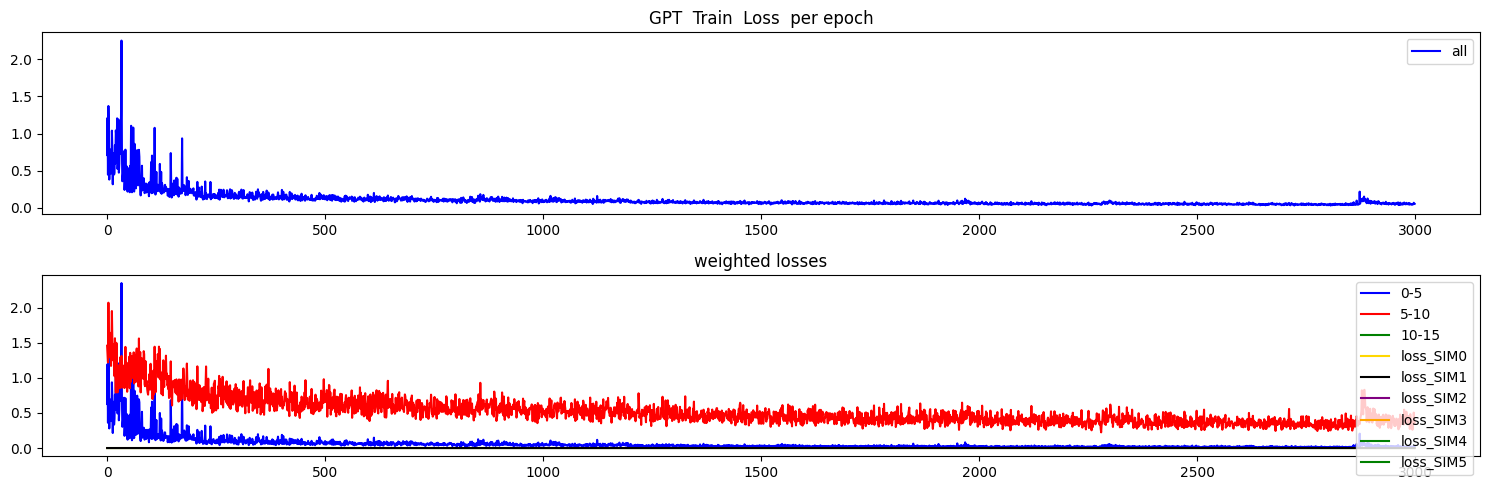

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


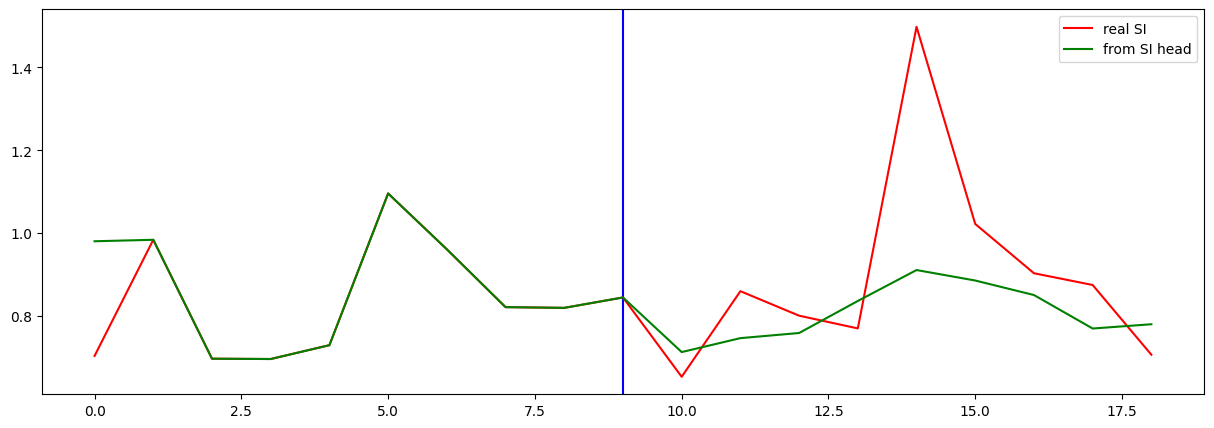

Testing R**2 - (all) - (no inputs):  0.9941558003096185
Testing R**2 - (f2) - SI full (no inputs):  -0.531533710908519
Testing R**2 - SI head only (no inputs):  -0.017396433651896137
0 ...index R**2 (no inputs):  0.07046852501981471
1 ...index R**2 (no inputs):  -0.36423755587365236
2 ...index R**2 (no inputs):  -0.531533710908519
3 ...index R**2 (no inputs):  -244.9836727968967
4 ...index R**2 (no inputs):  -11885.030704746865
5 ...index R**2 (no inputs):  -5.806124308138562
6 ...index R**2 (no inputs):  -18.879953649454958
7 ...index R**2 (no inputs):  -171959.17957555022
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.12615010143637306
10 ...index R**2 (no inputs):  0.5471270388867582
11 ...index R**2 (no inputs):  -296.97376435813067
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.1371147097688494
16 ...index R**2 (no inputs):  -1.5558502872001743
17 ...index R**2 (no input

In [46]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                chunk200to400_train, 
                                reasoning_steps=10,
                                backprop_through_steps=True 
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 0.466405
Loss_SI: 0.39969128370285034 Loss_all: 1.0668244361877441
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.134662
Loss_SI: 0.09224189817905426 Loss_all: 0.5164456963539124
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.117339
Loss_SI: 0.07555580139160156 Loss_all: 0.49338510632514954
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.079335
Loss_SI: 0.0320417694747448 Loss_all: 0.5049752593040466
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.075014
Loss_SI: 0.03869454190135002 Loss_all: 0.40188512206077576
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.107103
Loss_SI: 0.07022374123334885 Loss_all: 0.4390144646167755
Prediction shape: torch.Size([32, 35])
===


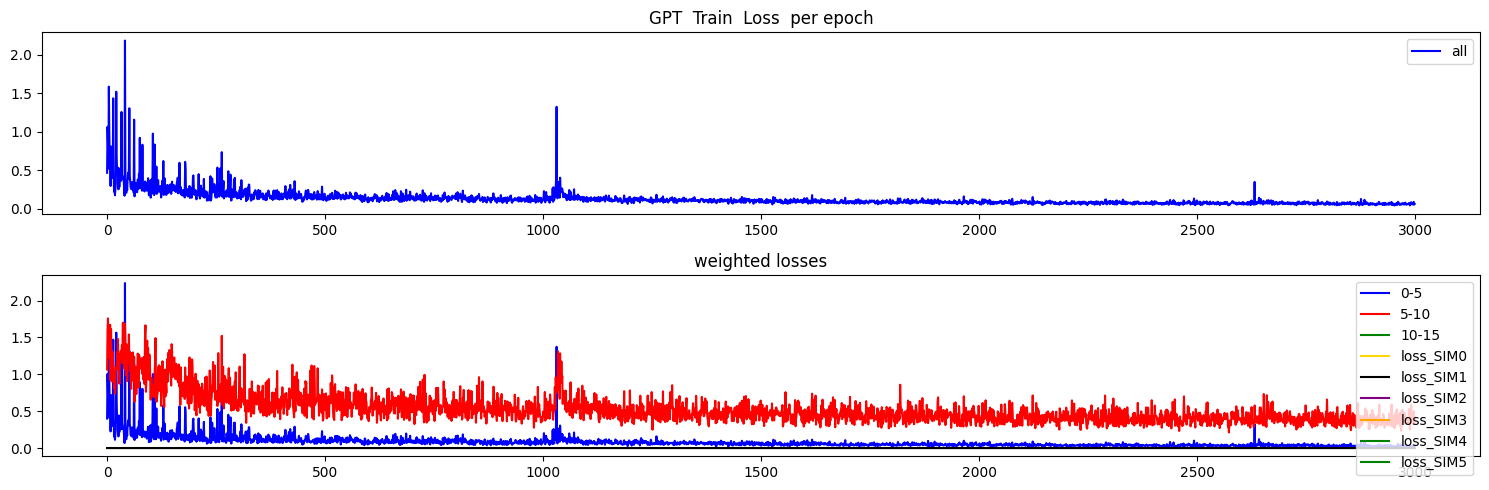

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


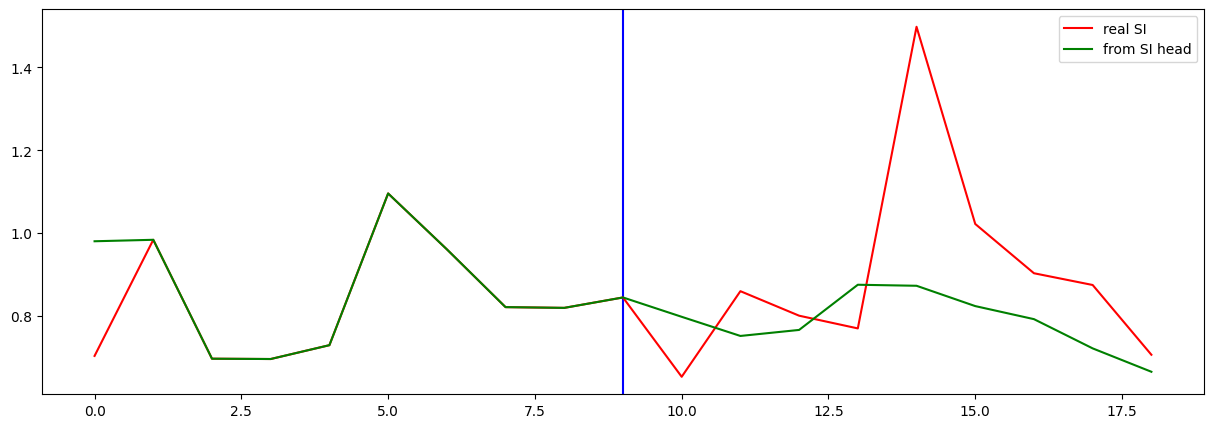

Testing R**2 - (all) - (no inputs):  0.9706066387597783
Testing R**2 - (f2) - SI full (no inputs):  -0.20542046441561146
Testing R**2 - SI head only (no inputs):  0.09740920225941252
0 ...index R**2 (no inputs):  0.0711997011019736
1 ...index R**2 (no inputs):  0.019137913297979536
2 ...index R**2 (no inputs):  -0.20542046441561146
3 ...index R**2 (no inputs):  -164.5456353262175
4 ...index R**2 (no inputs):  -13067.772286525395
5 ...index R**2 (no inputs):  -8.528114528107055
6 ...index R**2 (no inputs):  -61.785794767926234
7 ...index R**2 (no inputs):  -169557.08485580923
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.13519887217385707
10 ...index R**2 (no inputs):  0.1959143301724925
11 ...index R**2 (no inputs):  -81.22205050477632
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.0682053617878573
16 ...index R**2 (no inputs):  -1.4372342650154057
17 ...index R**2 (no input

In [47]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk100to400_train, 
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 0.315897
Loss_SI: 0.252992182970047 Loss_all: 0.8820434212684631
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.185802
Loss_SI: 0.13120156526565552 Loss_all: 0.6772076487541199
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.095509
Loss_SI: 0.05965762957930565 Loss_all: 0.41816672682762146
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.091146
Loss_SI: 0.06895977258682251 Loss_all: 0.2908185124397278
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.084701
Loss_SI: 0.05201466381549835 Loss_all: 0.3788761496543884
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.078665
Loss_SI: 0.048208706080913544 Loss_all: 0.35277485847473145
Prediction shape: torch.Size([32, 35])
===


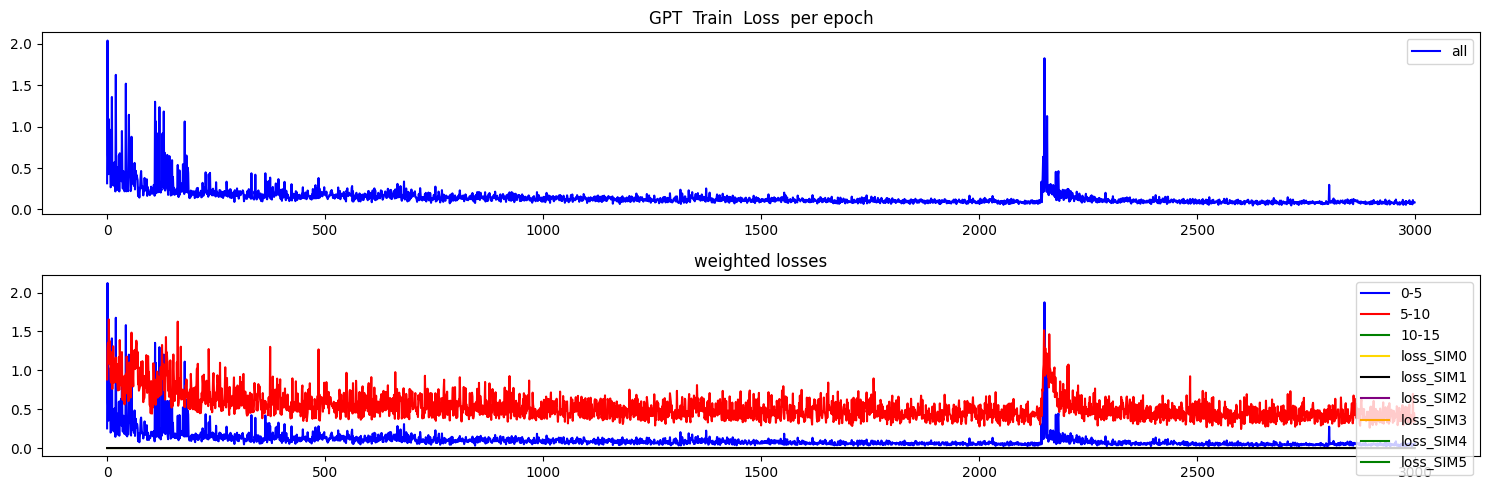

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


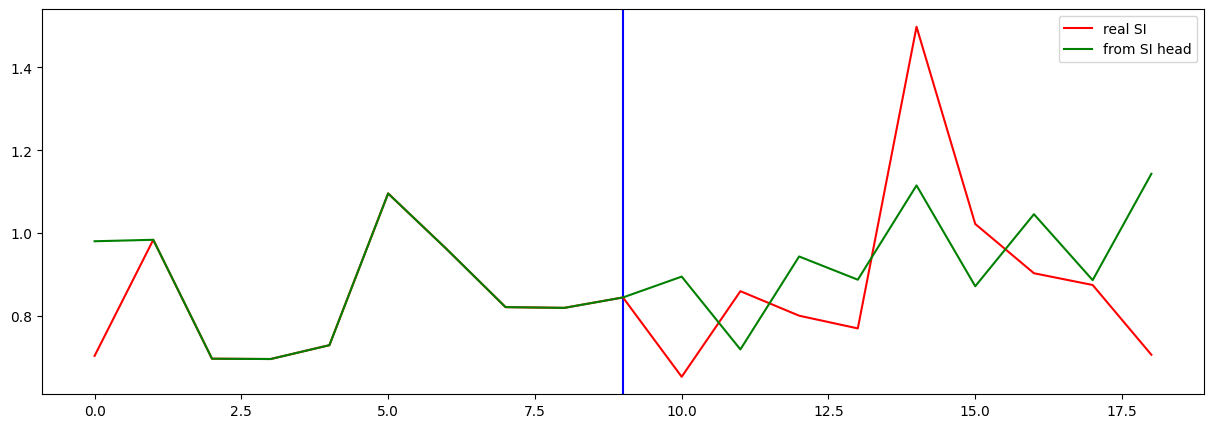

Testing R**2 - (all) - (no inputs):  0.9944665160669066
Testing R**2 - (f2) - SI full (no inputs):  -0.9338069456494471
Testing R**2 - SI head only (no inputs):  -0.4142172749953561
0 ...index R**2 (no inputs):  -0.33264748333892613
1 ...index R**2 (no inputs):  -1.0161484320158904
2 ...index R**2 (no inputs):  -0.9338069456494471
3 ...index R**2 (no inputs):  -1450.6686403065519
4 ...index R**2 (no inputs):  -627.0051116540783
5 ...index R**2 (no inputs):  -3.2787992138750433
6 ...index R**2 (no inputs):  -27.50550009304024
7 ...index R**2 (no inputs):  -6922.007631423435
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.06419886439923639
10 ...index R**2 (no inputs):  -0.20224177228081452
11 ...index R**2 (no inputs):  -1269.3029550581252
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -3.9713463116152656
16 ...index R**2 (no inputs):  -0.7146268714901987
17 ...index R**2 (no input

In [48]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk000to400_train,
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)

res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## R2 over accumulated Runs


In [49]:

from sklearn.metrics import r2_score


real_si_concat_300to400 = np.concatenate(all_real_si_300to400)
pred_si_concat_300to400 = np.concatenate(all_pred_si_300to400)

real_si_concat_200to400 = np.concatenate(all_real_si_200to400)
pred_si_concat_200to400 = np.concatenate(all_pred_si_200to400)

real_si_concat_100to400 = np.concatenate(all_real_si_100to400)
pred_si_concat_100to400 = np.concatenate(all_pred_si_100to400)

real_si_concat_000to400 = np.concatenate(all_real_si_000to400)
pred_si_concat_000to400 = np.concatenate(all_pred_si_000to400)


In [50]:


r2 = r2_score(real_si_concat_300to400, pred_si_concat_300to400 )

print("Accumulated R² 300to400:", r2)


Accumulated R² 300to400: -0.2575576500550263


In [51]:

r2 = r2_score(real_si_concat_200to400, pred_si_concat_200to400 )

print("Accumulated R² 200to400:", r2)


Accumulated R² 200to400: -0.1586593211823708


In [52]:

r2 = r2_score(real_si_concat_100to400, pred_si_concat_100to400 )

print("Accumulated R² 100to400:", r2)


Accumulated R² 100to400: -0.5376392835912938


In [53]:

r2 = r2_score(real_si_concat_000to400, pred_si_concat_000to400 )

print("Accumulated R² 000to400:", r2)


Accumulated R² 000to400: -0.36608090261959414



## First Few R2


In [54]:

from sklearn.metrics import r2_score
import numpy as np


def print_first_few_R2( real_si_concat, pred_si_concat, THE_FIRST_FEW ):

    first_n = THE_FIRST_FEW

    real = np.array( real_si_concat  )
    pred = np.array( pred_si_concat  )

    real_first4 = []
    pred_first4 = []

    for i in range(0, len(real), 9):
        real_first4.extend(real[i:i+first_n])
        pred_first4.extend(pred[i:i+first_n])

    # Convert to numpy arrays
    real_first4 = np.array(real_first4)
    pred_first4 = np.array(pred_first4)

    # Compute R²
    r2_first4 = r2_score(real_first4, pred_first4)
    print(THE_FIRST_FEW, ".....R² on first n steps:", r2_first4)


In [55]:

print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 1 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 2 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 3 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 4 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 5 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 6 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 7 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 8 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 9 )


1 .....R² on first n steps: -3.771009089905191
2 .....R² on first n steps: -1.9268539009452148
3 .....R² on first n steps: -2.1647248626784408
4 .....R² on first n steps: -0.6235288182351768
5 .....R² on first n steps: -0.4356630477534926
6 .....R² on first n steps: -0.2353859951391546
7 .....R² on first n steps: -0.20970938802752803
8 .....R² on first n steps: -0.23893693296881668
9 .....R² on first n steps: -0.2575576500550263


In [56]:

print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 1 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 2 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 3 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 4 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 5 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 6 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 7 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 8 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 9 )


1 .....R² on first n steps: -9.123801704097723
2 .....R² on first n steps: -3.1079299670881717
3 .....R² on first n steps: -2.427881555496548
4 .....R² on first n steps: -0.7424303255948537
5 .....R² on first n steps: -0.4916927291548976
6 .....R² on first n steps: -0.221683663272638
7 .....R² on first n steps: -0.16396885959987584
8 .....R² on first n steps: -0.1585099896430462
9 .....R² on first n steps: -0.1586593211823708


In [57]:

print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 1 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 2 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 3 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 4 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 5 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 6 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 7 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 8 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 9 )



1 .....R² on first n steps: -9.83006810396974
2 .....R² on first n steps: -3.794778112632022
3 .....R² on first n steps: -3.5528942865837827
4 .....R² on first n steps: -1.2924976086211553
5 .....R² on first n steps: -0.9602763635744975
6 .....R² on first n steps: -0.6389924417652488
7 .....R² on first n steps: -0.5856419341756416
8 .....R² on first n steps: -0.5207761624441902
9 .....R² on first n steps: -0.5376392835912938


In [58]:

print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 1 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 2 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 3 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 4 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 5 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 6 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 7 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 8 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 9 )


1 .....R² on first n steps: -7.651501287021141
2 .....R² on first n steps: -2.95941279180539
3 .....R² on first n steps: -2.4293453625109294
4 .....R² on first n steps: -0.638733535635817
5 .....R² on first n steps: -0.4787718315305671
6 .....R² on first n steps: -0.32001178912947714
7 .....R² on first n steps: -0.2531223363903894
8 .....R² on first n steps: -0.22241144942764346
9 .....R² on first n steps: -0.36608090261959414



## Plot


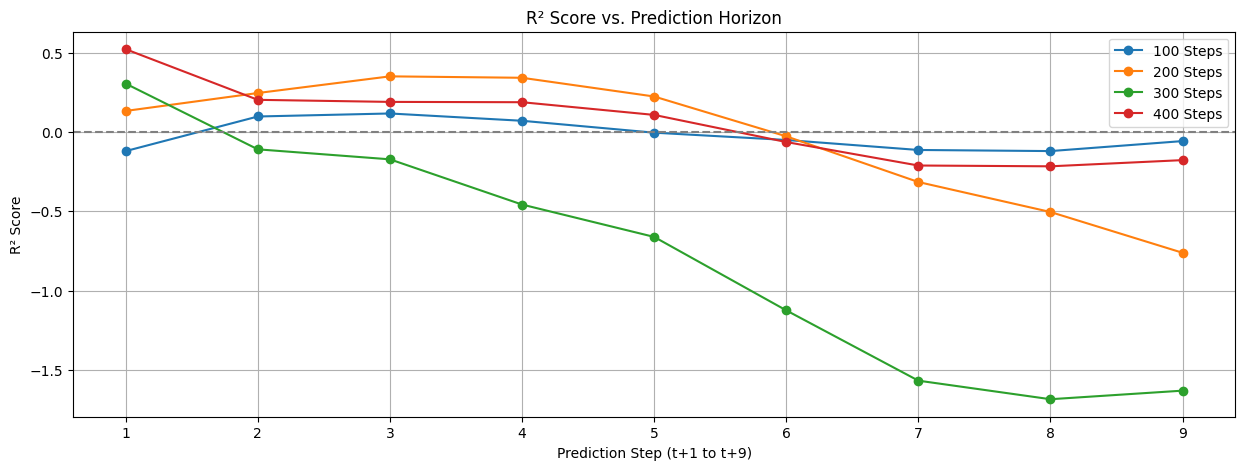

In [59]:

import matplotlib.pyplot as plt

def plot_r2_curves():
    steps = list(range(1, 10))

    r2_100 = [-0.121, 0.097, 0.116, 0.070, -0.005, -0.051, -0.114, -0.121, -0.058]
    r2_200 = [0.132, 0.245, 0.350, 0.341, 0.223, -0.028, -0.316, -0.505, -0.762]
    r2_300 = [0.304, -0.110, -0.173, -0.458, -0.662, -1.125, -1.568, -1.685, -1.631]
    r2_400 = [0.521, 0.202, 0.189, 0.187, 0.107, -0.064, -0.212, -0.217, -0.178]

    plt.plot(steps, r2_100, marker='o', label='100 Steps')
    plt.plot(steps, r2_200, marker='o', label='200 Steps')
    plt.plot(steps, r2_300, marker='o', label='300 Steps')
    plt.plot(steps, r2_400, marker='o', label='400 Steps')

    plt.title("R² Score vs. Prediction Horizon")
    plt.xlabel("Prediction Step (t+1 to t+9)")
    plt.ylabel("R² Score")
    plt.legend()
    plt.grid(True)
    plt.axhline(0, color='gray', linestyle='--')
    plt.show()


plot_r2_curves()
    
